<a href="https://colab.research.google.com/github/domanmat/Airbnb_data_analysis/blob/main/projekt_PRBD_Domanski_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and load packages

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats


In [2]:
sns.set_style("whitegrid")

# Ustawienia Pandas - pokazuje wszystkie kolumny i wiersze
pd.set_option('display.max_columns', None)          # Wszystkie kolumny
pd.set_option('display.width', 1000)                # Szerokość wyświetlania
pd.set_option('display.max_colwidth', 50)           # Max szerokość pojedynczej kolumny
pd.set_option('display.expand_frame_repr', False)   # Nie łam DataFrame na wiele linii
pd.set_option('display.max_rows', None)             # Wszystkie wiersze

# '1. LOAD DATA

###Download

In [3]:
# download data for Dublin
import gdown
url = 'https://data.insideairbnb.com/ireland/leinster/dublin/2025-09-16/data/listings.csv.gz'

output = "listings_Dublin.gz"
gdown.download(url, output)

Downloading...
From: https://data.insideairbnb.com/ireland/leinster/dublin/2025-09-16/data/listings.csv.gz
To: /content/listings_Dublin.gz
100%|██████████| 3.33M/3.33M [00:00<00:00, 55.8MB/s]


'listings_Dublin.gz'

In [4]:
!ls -lah

total 22M
drwxr-xr-x 1 root root 4.0K Jan 17 01:54 .
drwxr-xr-x 1 root root 4.0K Jan 16 19:16 ..
-rw-r--r-- 1 root root 192K Jan 17 01:42 boolean_distributions.png
-rw-r--r-- 1 root root 314K Jan 16 23:41 boxplots_top_associations.png
-rw-r--r-- 1 root root 207K Jan 17 01:49 categorical_distributions.png
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
-rw-r--r-- 1 root root 2.1M Jan 17 01:53 correlation_heatmap.png
-rw-r--r-- 1 root root 145K Jan 17 01:44 cramers_v_heatmap.png
-rw-r--r-- 1 root root  89K Jan 17 01:42 date_distributions.png
-rw-r--r-- 1 root root  14M Oct 25 16:53 listings.csv
-rw-r--r-- 1 root root 3.2M Jan 17 01:54 listings_Dublin.gz
-rw-r--r-- 1 root root 852K Jan 17 01:35 numerical_distributions.png
-rw-r--r-- 1 root root 679K Jan 17 01:44 pairplot_top_vars.png
-rw-r--r-- 1 root root 359K Jan 16 23:41 r2_heatmap.png
-rw-r--r-- 1 root root  54K Jan 17 01:44 r2_heatmap_top10.png
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


### Extract files

In [5]:
# unzip the file
!7z x {output} -y


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 3329429 bytes (3252 KiB)

Extracting archive: listings_Dublin.gz
--
Path = listings_Dublin.gz
Type = gzip
Headers Size = 23

  0% - listings.csv                    37% - listings.csv                    78% - listings.csv                   Everything is Ok

Size:       14346864
Compressed: 3329429


In [6]:
!ls -lah

total 22M
drwxr-xr-x 1 root root 4.0K Jan 17 01:54 .
drwxr-xr-x 1 root root 4.0K Jan 16 19:16 ..
-rw-r--r-- 1 root root 192K Jan 17 01:42 boolean_distributions.png
-rw-r--r-- 1 root root 314K Jan 16 23:41 boxplots_top_associations.png
-rw-r--r-- 1 root root 207K Jan 17 01:49 categorical_distributions.png
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
-rw-r--r-- 1 root root 2.1M Jan 17 01:53 correlation_heatmap.png
-rw-r--r-- 1 root root 145K Jan 17 01:44 cramers_v_heatmap.png
-rw-r--r-- 1 root root  89K Jan 17 01:42 date_distributions.png
-rw-r--r-- 1 root root  14M Oct 25 16:53 listings.csv
-rw-r--r-- 1 root root 3.2M Jan 17 01:54 listings_Dublin.gz
-rw-r--r-- 1 root root 852K Jan 17 01:35 numerical_distributions.png
-rw-r--r-- 1 root root 679K Jan 17 01:44 pairplot_top_vars.png
-rw-r--r-- 1 root root 359K Jan 16 23:41 r2_heatmap.png
-rw-r--r-- 1 root root  54K Jan 17 01:44 r2_heatmap_top10.png
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


### Read data

In [7]:
data_raw = pd.read_csv('listings.csv')

# '2. SIZE OF DATA

## Data Size and info

In [8]:
print(data_raw.shape)

(6945, 79)


In [9]:
# Print data_raw info
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6945 entries, 0 to 6944
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6945 non-null   int64  
 1   listing_url                                   6945 non-null   object 
 2   scrape_id                                     6945 non-null   int64  
 3   last_scraped                                  6945 non-null   object 
 4   source                                        6945 non-null   object 
 5   name                                          6945 non-null   object 
 6   description                                   6827 non-null   object 
 7   neighborhood_overview                         2480 non-null   object 
 8   picture_url                                   6945 non-null   object 
 9   host_id                                       6945 non-null   i

# '3. SAMPLE DATA

## Rzut oka na data_raw

In [10]:
data_raw.head(10)

id                          listing_url       scrape_id last_scraped           source                                              name                                        description                              neighborhood_overview                                        picture_url  host_id                                   host_url       host_name  host_since            host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url        host_neighbourhood  host_listings_count  host_total_listings_count                host_verifications host_has_profile_pic host_identity_verified                   neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude              property_type        room_type  accommodates  bathrooms    bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  license instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
0   44077   https://www.airbnb.com/rooms/44077  20250916040708   2025-09-16      city scrape               cosy comfortable Irish cottage twin  Our house is a cosy comfortable cottage  with ...  I like our neighbourhood as there is no shorta...  https://a0.muscache.com/pictures/525706/050a3a...   193005   https://www.airbnb.com/users/show/193005          Teresa  2010-08-06          Dublin, Ireland  I am  a friendly outgoing Irishwoman ,who love...      within an hour               100%                  97%                 t  https://a0.muscache.com/im/pictures/user/2167f...  https://a0.muscache.com/im/pictures/user/2167f...                Churchtown                  2.0                        2.0                ['email', 'phone']                    t                      t             Churchtown, Ireland  Dn Laoghaire-Rathdown                           NaN  53.29178   -6.25792   Private room in bungalow     Private room             2        1.0    1 private bath       1.0   2.0  ["Paid washer \u2013 In unit", "Wine glasses",...   $86.00               3              30                     3.0                     3.0                    30.0                    30.0                     3.0                    30.0               NaN                t                6                9                9                 9            2025-09-16                394                     37                       5                 9                    42                        222                  19092.0   2011-03-20  2025-09-13                  4.82                    4.86                       4.77                   4.93                         4.93                    4.68                 4.83      NaN                f                               2                                            0                                             2                                            0               2.23
1   85156   https://www.airbnb.com/rooms/85156  20250916040708   2025-09-16  previous scrape      Cosy Comfortable Irish Cottage  1 Double Bed  Our Cottage is a char

## Raw Data summary

### funkcja - data_summary

In [11]:
def data_summary(data_raw):
  # Zestawienie typu zmiennej oraz kolumn
  summary = pd.DataFrame({
      'Column Name': data_raw.columns,
      'Type': data_raw.dtypes.values,
      'Non-Null Count': data_raw.count().values,
      'Missing Count': data_raw.isnull().sum().values,
      'Missing%': [f'{100-x*100:.2f}%' for x in (data_raw.count().values/(data_raw.count().values+data_raw.isnull().sum().values))],
      'Example row': data_raw.iloc[2]
  }).reset_index(drop=True)

  return summary


In [12]:
summary=data_summary(data_raw)
summary


Column Name     Type  Non-Null Count  Missing Count Missing%                                        Example row
0                                             id    int64            6945              0    0.00%                                             159889
1                                    listing_url   object            6945              0    0.00%                https://www.airbnb.com/rooms/159889
2                                      scrape_id    int64            6945              0    0.00%                                     20250916040708
3                                   last_scraped   object            6945              0    0.00%                                         2025-09-16
4                                         source   object            6945              0    0.00%                                        city scrape
5                                           name   object            6945              0    0.00%                               Friendly Single Room
6                                    description   object            6827            118    1.70%  Washing can be done at a cost of €5  per load....
7                          neighborhood_overview   object            2480           4465   64.29%  Plenty of buses into the city and the area is ...
8                                    picture_url   object            6945              0    0.00%  https://a0.muscache.com/pictures/3031697/a8259...
9                                        host_id    int64            6945              0    0.00%                                             766611
10                                      host_url   object            6945              0    0.00%           https://www.airbnb.com/users/show/766611
11                                     host_name   object            6944              1    0.01%                                              Marie
12                                    host_since   object            6944              1    0.01%                                         2011-07-01
13                                 host_location   object            5143           1802   25.95%                            Dublin Airport, Ireland
14                                    host_about   object            2792           4153   59.80%  Used to host students and now I  am looking fo...
15                            host_response_time   object            6031            914   13.16%                                 within a few hours
16                            host_response_rate   object            6031            914   13.16%                                                70%
17                          host_acceptance_rate   object            6485            460    6.62%                                                91%
18                             host_is_superhost   object            6573            372    5.36%                                                  f
19                            host_thumbnail_url   object            6944              1    0.01%  https://a0.muscache.com/im/pictures/user/5059e...
20                              host_picture_url   object            6944              1    0.01%  https://a0.muscache.com/im/pictures/user/5059e...
21                            host_neighbourhood   object            5535           1410   20.30%                                           Beaumont
22                           host_listings_count  float64            6944              1    0.01%                                                3.0
23                     host_total_listings_count  float64            6944              1    0.01%                                                3.0
24                            host_verifications   object            6944              1    0.01%                                 ['email', 'phone']
25                          host_has_profile_pic   object            6944              1    0.01%                                                  t
26            

Sprawdzenie - wszystkie źle skategoryzowane zmienne to 'object'

### funkcja - summary_check

In [13]:
def summary_check(summary):
  # Sprawdź czy są kolumny object z wartościami zawierającymi "."
  warnings = []
  date_columns=[]
  boolean_columns=[]
  percentage_columns=[]
  for idx, row in summary.iterrows():
      if row['Type'] == 'object':
          example_val = str(row['Example row'])
          if '.' in example_val and not any(c.isalpha() for c in example_val):
              warnings.append(f"⚠️ Numeric - Column '{row['Column Name']}' is 'object' but may contain numeric value:".ljust(85) + f" '{example_val}'")
  for idx, row in summary.iterrows():
      if row['Type'] == 'object':
          example_val = str(row['Example row'])
          if '-' in example_val and example_val.replace('.', '').replace('-', '').isdigit():
              warnings.append(f"⚠️ Date - Column '{row['Column Name']}' is 'object' but may contain date:".ljust(85) + f" '{example_val}'")
              date_columns.append(row['Column Name'])
  for idx, row in summary.iterrows():
      if row['Type'] == 'object':
          example_val = str(row['Example row'])
          if 'f' == example_val or 't' == example_val:
              warnings.append(f"⚠️ Boolean - Column '{row['Column Name']}' is 'object' but may contain boolean:".ljust(85) + f" '{example_val}'")
              boolean_columns.append(row['Column Name'])
  for idx, row in summary.iterrows():
      if row['Type'] == 'object':
          example_val = str(row['Example row'])
          if '%' in example_val and not any(c.isalpha() for c in example_val):
              warnings.append(f"⚠️ Numeric - Column '{row['Column Name']}' is 'object' but may contain percentage value:".ljust(85) + f" '{example_val}'")
              percentage_columns.append(row['Column Name'])

  if warnings:
      print("\n".join(warnings))
  if len(warnings) == 0:
      print("All data types are correctly assigned.")


  print("\n" + "="*50 + "\n")
  return date_columns, boolean_columns, percentage_columns



In [14]:
date_columns, boolean_columns, percentage_columns = summary_check(summary)
date_columns, boolean_columns, percentage_columns

⚠️ Numeric - Column 'price' is 'object' but may contain numeric value:                '$48.00'
⚠️ Date - Column 'last_scraped' is 'object' but may contain date:                     '2025-09-16'
⚠️ Date - Column 'host_since' is 'object' but may contain date:                       '2011-07-01'
⚠️ Date - Column 'calendar_last_scraped' is 'object' but may contain date:            '2025-09-16'
⚠️ Date - Column 'first_review' is 'object' but may contain date:                     '2012-03-20'
⚠️ Date - Column 'last_review' is 'object' but may contain date:                      '2025-09-14'
⚠️ Boolean - Column 'host_is_superhost' is 'object' but may contain boolean:          'f'
⚠️ Boolean - Column 'host_has_profile_pic' is 'object' but may contain boolean:       't'
⚠️ Boolean - Column 'host_identity_verified' is 'object' but may contain boolean:     't'
⚠️ Boolean - Column 'has_availability' is 'object' but may contain boolean:           't'
⚠️ Boolean - Column 'instant_bookable' is 'object'

(['last_scraped',
  'host_since',
  'calendar_last_scraped',
  'first_review',
  'last_review'],
 ['host_is_superhost',
  'host_has_profile_pic',
  'host_identity_verified',
  'has_availability',
  'instant_bookable'],
 ['host_response_rate', 'host_acceptance_rate'])

# '4. DATA TYPES VERIFICATION + korekty

## Cast variables

### price

Cast price column to float (replace "$", "," and cast to "float")

In [15]:
data = data_raw.copy()

In [16]:
# Inspect
data.price.describe()

count        5244
unique        597
top       $100.00
freq           82
Name: price, dtype: object

In [17]:
# # Cast price to float
# data.price.str.replace("$","").str.replace(",","").astype("float").describe()

In [18]:
# Cast price as float
data['price'] = data['price'].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype("float")

### percentage

Cast column with 'rate' to float (replace "%", "" and cast to "float")

In [19]:
# Rzutuj kolumny dat na typ datetime
for col in percentage_columns:
    data[col] = data[col] .str.rstrip('%').astype('float') / 100

# Sprawdź wynik
print(data[percentage_columns].dtypes)
print()
print(data[percentage_columns].head())

host_response_rate      float64
host_acceptance_rate    float64
dtype: object

   host_response_rate  host_acceptance_rate
0                 1.0                  0.97
1                 1.0                  0.97
2                 0.7                  0.91
3                 1.0                  0.95
4                 1.0                  0.86


### date_columns

In [20]:
# Rzutuj kolumny dat na typ datetime
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Sprawdź wynik
print(data[date_columns].dtypes)
print()
print(data[date_columns].head())

last_scraped             datetime64[ns]
host_since               datetime64[ns]
calendar_last_scraped    datetime64[ns]
first_review             datetime64[ns]
last_review              datetime64[ns]
dtype: object

  last_scraped host_since calendar_last_scraped first_review last_review
0   2025-09-16 2010-08-06            2025-09-16   2011-03-20  2025-09-13
1   2025-09-16 2010-08-06            2025-09-16   2011-05-24  2025-09-14
2   2025-09-16 2011-07-01            2025-09-16   2012-03-20  2025-09-14
3   2025-09-16 2011-07-04            2025-09-16   2015-06-01  2025-09-11
4   2025-09-16 2011-10-04            2025-09-16   2011-12-22  2025-09-09


### boolean columns

In [21]:
# Rzutuj kolumny logiczne (t/f) na 0 lub 1
data[boolean_columns] = data[boolean_columns].replace({'t': 1, 'f': 0}).astype('Int64')

# Sprawdź wynik
print(data[boolean_columns].dtypes)
print()
print(data[boolean_columns].head())

host_is_superhost         Int64
host_has_profile_pic      Int64
host_identity_verified    Int64
has_availability          Int64
instant_bookable          Int64
dtype: object

   host_is_superhost  host_has_profile_pic  host_identity_verified  has_availability  instant_bookable
0                  1                     1                       1                 1                 0
1                  1                     1                       1                 1                 0
2                  0                     1                       1                 1                 0
3                  0                     1                       1                 1                 0
4                  0                     1                       1                 1                 0


/tmp/ipython-input-1172303690.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[boolean_columns] = data[boolean_columns].replace({'t': 1, 'f': 0}).astype('Int64')


## Tworzenie nowych zmiennych na podstawie danych

### New Variable - Lokalizacja względem innych Airbnb
Średnia z jednej i drugiej współrzędnej powinna dać centrum lokali na Airbnb.

In [22]:
lat_mean = data['latitude'].mean()
lon_mean = data['longitude'].mean()

data['lat_dist_mean'] = np.sqrt((data['latitude'] - lat_mean) ** 2)
data['lon_dist_mean'] = np.sqrt((data['longitude'] - lon_mean) ** 2)

### New Variable - Distance from city centre
odległość od centrum miasta

In [23]:
# Punkt referencyjny - 'centrum Dublina'
ref_lat = 53.3522
ref_lon = -6.2608

# Obliczanie kwadratu odległości od punktu referencyjnego
data['lat_dist_centre'] = (data['latitude'] - ref_lat) ** 2
data['lon_dist_centre'] = (data['longitude'] - ref_lon) ** 2

# Opcjonalnie: rzeczywista odległość euklidesowa od centrum
data['dist_from_center'] = np.sqrt(data['lat_dist_centre'] + data['lon_dist_centre'])
data.drop(['lon_dist_centre'], axis=1, inplace=True)
data.drop(['lat_dist_centre'], axis=1, inplace=True)

### New Variable - Neighbourhood

one-hot encoding - kodowanie do zmiennej numerycznej

In [24]:
top_n = 20
data['neighbourhood_cleansed'].value_counts().nlargest(top_n).to_dict()

{'Dublin City': 4815,
 'Fingal': 853,
 'Dn Laoghaire-Rathdown': 792,
 'South Dublin': 485}

In [25]:
top_nbhds = list(data['neighbourhood_cleansed'].value_counts().nlargest(top_n).index)
data['neighbourhood_cleansed_map'] = data['neighbourhood_cleansed'].apply(lambda x: x if x in top_nbhds else 'other')

stats = data.groupby('neighbourhood_cleansed_map')['price'].agg([
    'count',
    'mean',
    'median'
]).sort_values('mean', ascending=False)

# Dodaj wiersz "ALL" na końcu
stats.loc['─' * 20] = ['', '', '']  # separator
stats.loc['ALL (Total)'] = [
    data['price'].count(),
    data['price'].mean(),
    data['price'].median()
]

stats['mean'] = stats['mean'].round(2)
stats


count        mean median
neighbourhood_cleansed_map                           
Dublin City                   3501  215.098543  150.0
Fingal                         695  201.700719  108.0
Dn Laoghaire-Rathdown          622  198.247588  137.0
South Dublin                   426  131.065728   91.5
────────────────────                                 
ALL (Total)                 5244.0  204.497712  137.0

### Parsowanie amenities

In [26]:
import ast
from collections import Counter

data_amenities = data.copy()

# Jeśli wartości są stringami reprezentującymi listy
data_amenities['amenities_parsed'] = data['amenities'].apply(ast.literal_eval)

# Rozwiń wszystkie amenities do pojedynczych wierszy
amenities_expanded = data_amenities.explode('amenities_parsed')

# Podstawowe statystyki
print("Najczęstsze udogodnienia:")
print(amenities_expanded['amenities_parsed'].value_counts().head(20))

Najczęstsze udogodnienia:
amenities_parsed
Smoke alarm              6406
Wifi                     6295
Kitchen                  5738
Hot water                5216
Carbon monoxide alarm    4777
Hair dryer               4641
Hangers                  4615
Iron                     4606
Bed linens               4528
Essentials               4344
Dishes and silverware    4206
Washer                   4083
Fire extinguisher        4022
Refrigerator             3937
Cooking basics           3861
Microwave                3747
Hot water kettle         3666
Heating                  3605
TV                       3579
Shampoo                  3549
Name: count, dtype: int64


In [27]:
amenity_counts = Counter()
for amenities in data_amenities['amenities_parsed']:
    amenity_counts.update(amenities)

# Całkowita liczba wierszy
total_rows = len(data_amenities)

percentage_amenity=0.2

# Filtrowanie amenities występujących w >X% wierszy
amenities_used = [
    amenity for amenity, count in amenity_counts.items()
    if (count / total_rows) > percentage_amenity
]

# Znajdź najdłuższą nazwę amenity dla wyrównania
max_len = max(len(amenity) for amenity in amenities_used)

# Sortowanie według count (malejąco)
sorted_amenities = sorted(amenities_used,
                         key=lambda x: amenity_counts[x],
                         reverse=True)

# Wyświetlenie wyników
print(f"Liczba amenities występujących w >{percentage_amenity*100}% wierszy: {len(amenities_used)}")
print(f"\nLista amenities_used:")
for amenity in sorted_amenities:
    count = amenity_counts[amenity]
    percentage = (count / total_rows) * 100
    print(f"  {amenity:<{max_len}} : {count:>6}/{total_rows} ({percentage:>5.1f}%)")

Liczba amenities występujących w >20.0% wierszy: 51

Lista amenities_used:
  Smoke alarm                           :   6406/6945 ( 92.2%)
  Wifi                                  :   6295/6945 ( 90.6%)
  Kitchen                               :   5738/6945 ( 82.6%)
  Hot water                             :   5216/6945 ( 75.1%)
  Carbon monoxide alarm                 :   4777/6945 ( 68.8%)
  Hair dryer                            :   4641/6945 ( 66.8%)
  Hangers                               :   4615/6945 ( 66.5%)
  Iron                                  :   4606/6945 ( 66.3%)
  Bed linens                            :   4528/6945 ( 65.2%)
  Essentials                            :   4344/6945 ( 62.5%)
  Dishes and silverware                 :   4206/6945 ( 60.6%)
  Washer                                :   4083/6945 ( 58.8%)
  Fire extinguisher                     :   4022/6945 ( 57.9%)
  Refrigerator                          :   3937/6945 ( 56.7%)
  Cooking basics                        :  

### New Variable - Amenities - udogodnienia
lista tego, co się znajduje w każdym mieszkaniu, lista która jest dość długa.


In [28]:
data=data.copy()
data['n_amenities'] = data['amenities'].apply(lambda x: len(x.split(',')))

# # Parsowanie kolumny amenities jeśli jeszcze nie jest listą
# if data['amenities'].dtype == 'object' and isinstance(data['amenities'].iloc[0], str):
#     import ast
#     data['amenities_parsed'] = data['amenities'].apply(ast.literal_eval)
# else:
#     data['amenities_parsed'] = data['amenities']

from collections import Counter
# Zbierz wszystkie amenities z wszystkich ofert
all_amenities = []
for amenity_list in data_amenities['amenities_parsed']:
    all_amenities.extend(amenity_list)
# Policz częstotliwość
amenity_counts = Counter(all_amenities)
# 5 najczęstszych
top_5_amenities = [amenity for amenity, count in amenity_counts.most_common(5)]

print("Dodano 5 najczęściej występujących amenities:")
for amenity, count in amenity_counts.most_common(5):
    print(f"  {amenity}: {count} ({count/len(data)*100:.1f}%)")

# Użyj top 5
amenities_used = top_5_amenities

# Tworzenie binarnych kolumn dla każdego amenity z listy amenities_used
for amenity in amenities_used:
    column_name = f"is_{amenity.lower().replace(' ', '_').replace('\u2019', '').replace('-', '_').replace(':', '').replace('/', '_').replace('-', '_').replace('–', '_')}"
    data[column_name] = data_amenities['amenities_parsed'].apply(
        lambda x: 1 if amenity in x else 0
    )

# data.drop(['amenities_parsed'], axis=1, inplace=True)
# data.head(3)

Dodano 5 najczęściej występujących amenities:
  Smoke alarm: 6406 (92.2%)
  Wifi: 6295 (90.6%)
  Kitchen: 5738 (82.6%)
  Hot water: 5216 (75.1%)
  Carbon monoxide alarm: 4777 (68.8%)


### New Variable - Property_type

In [29]:
top_n = 6
data['property_type'].value_counts().nlargest(top_n).to_dict()

{'Entire rental unit': 1669,
 'Private room in home': 1479,
 'Entire home': 1247,
 'Private room in rental unit': 714,
 'Entire condo': 561,
 'Private room in condo': 304}

In [30]:
top_pr_type = list(data['property_type'].value_counts().nlargest(top_n).index)
data['property_type_map'] = data['property_type'].apply(lambda x: x if x in top_pr_type else 'other')
data['property_type_map'].head(3)

0                   other
1                   other
2    Private room in home
Name: property_type_map, dtype: object

In [31]:
# data.replace({'host_is_superhost' : {'t' : 1, 'f' : 0}}, inplace=True)
data.replace({'instant_bookable' : {'t' : 1, 'f' : 0}}, inplace=True)

# Kodowanie zmiennych kategorycznych do numerycznych
one-hot encoding - po to by móc zrobić SHAP i xgBoost (tylko numeryczne przyjmuje)

In [32]:
# Zakoduj zmienne kategoryczne
data_encoded = data.copy()

# Konwertuj wszystkie boolean na int
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

# One-hot encoding dla zmiennych kategorycznych
categorical_cols = ['property_type_map', 'neighbourhood_cleansed_map']

# Definiuj niestandardowe prefiksy (bez trailing underscore)
prefix_mapping = {
    'property_type_map': 'property',
    'neighbourhood_cleansed_map': 'neighbourhood'}

for col in categorical_cols:
    if col in data_encoded.columns:
        prefix = prefix_mapping.get(col)         # Użyj niestandardowego prefiksu z mappingu
        dummies = pd.get_dummies(data_encoded[col], prefix=prefix, drop_first=True, dtype=int)
        dummies.columns = dummies.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('.', '')
        data_encoded = pd.concat([data_encoded.drop(col, axis=1), dummies], axis=1)

# Zamień spacje na podkreślenia we wszystkich nazwach kolumn (na wszelki wypadek)
data_encoded.columns = data_encoded.columns.str.replace(' ', '_')

# data_encoded.head(10).T
data=data_encoded.copy()

# Summary: post-processed

In [33]:
summary = data_summary(data)
summary['Type'] = summary['Type'].astype(str)
summary = summary.sort_values(by='Type')
summary

Column Name            Type  Non-Null Count  Missing Count Missing%                                        Example row
50                              has_availability           Int64            6834            111    1.60%                                                  1
73                              instant_bookable           Int64            6945              0    0.00%                                                  0
25                          host_has_profile_pic           Int64            6944              1    0.01%                                                  1
26                        host_identity_verified           Int64            6944              1    0.01%                                                  1
18                             host_is_superhost           Int64            6573            372    5.36%                                                  0
64                                   last_review  datetime64[ns]            5903           1042   15.00%                                2025-09-14 00:00:00
3                                   last_scraped  datetime64[ns]            6945              0    0.00%                                2025-09-16 00:00:00
63                                  first_review  datetime64[ns]            5903           1042   15.00%                                2012-03-20 00:00:00
12                                    host_since  datetime64[ns]            6944              1    0.01%                                2011-07-01 00:00:00
55                         calendar_last_scraped  datetime64[ns]            6945              0    0.00%                                2025-09-16 00:00:00
72                                       license         float64               0           6945  100.00%                                                NaN
69                   review_scores_communication         float64            5903           1042   15.00%                                               4.87
37                                      bedrooms         float64            6314            631    9.09%                                                1.0
38                                          beds         float64            5241           1704   24.54%                                                1.0
71                           review_scores_value         float64            5903           1042   15.00%                                                4.7
40                                         price         float64            5244           1701   24.49%                                               48.0
35                                     bathrooms         float64            5237           1708   24.59%                                                2.0
70                        review_scores_location         float64            5903           1042   15.00%                                               4.65
48                        maximum_nights_avg_ntm         float64            6945              0    0.00%                                               14.0
45                        minimum_maximum_nights         float64            6943              2    0.03%                                               14.0
44                        maximum_minimum_nights         float64            6943              2    0.03%                                                2.0
46                        maximum_maximum_nights         float64            6943              2    0.03%                                               14.0
47                        minimum_nights_avg_ntm         float64            6945              0    0.00%                                                2.0
68                         review_scores_checkin         float64            5903           1042   15.00%                                               4.84
49                              calendar_updated         float64               0           6945  100.00%                                 

# Summary - check data types

In [34]:
date_columns_postprocess = summary_check(summary)
date_columns_postprocess

All data types are correctly assigned.




([], [], [])

# Variable lists

### Numerical cols - list

In [35]:
# get all numeric - just string creation
numerical_cols = [x for x in data.select_dtypes(include=['number']).columns]

# print numerical features
print(numerical_cols)
# print(" \n + ".join(numerical_cols))

['id', 'scrape_id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_

In [36]:
print(" \n".join(numerical_cols))

id 
scrape_id 
host_id 
host_response_rate 
host_acceptance_rate 
host_is_superhost 
host_listings_count 
host_total_listings_count 
host_has_profile_pic 
host_identity_verified 
neighbourhood_group_cleansed 
latitude 
longitude 
accommodates 
bathrooms 
bedrooms 
beds 
price 
minimum_nights 
maximum_nights 
minimum_minimum_nights 
maximum_minimum_nights 
minimum_maximum_nights 
maximum_maximum_nights 
minimum_nights_avg_ntm 
maximum_nights_avg_ntm 
calendar_updated 
has_availability 
availability_30 
availability_60 
availability_90 
availability_365 
number_of_reviews 
number_of_reviews_ltm 
number_of_reviews_l30d 
availability_eoy 
number_of_reviews_ly 
estimated_occupancy_l365d 
estimated_revenue_l365d 
review_scores_rating 
review_scores_accuracy 
review_scores_cleanliness 
review_scores_checkin 
review_scores_communication 
review_scores_location 
review_scores_value 
license 
instant_bookable 
calculated_host_listings_count 
calculated_host_listings_count_entire_homes 
calculate

### Boolean cols - list

In [37]:
# Znajdź kolumny boolean (tylko 0 lub 1)
boolean_columns = [
    col for col in data.select_dtypes(include=['number']).columns
    if data[col].dropna().isin([0, 1]).all()
]
boolean_columns


['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'calendar_updated',
 'has_availability',
 'license',
 'instant_bookable',
 'is_smoke_alarm',
 'is_wifi',
 'is_kitchen',
 'is_hot_water',
 'is_carbon_monoxide_alarm',
 'property_Entire_home',
 'property_Entire_rental_unit',
 'property_Private_room_in_condo',
 'property_Private_room_in_home',
 'property_Private_room_in_rental_unit',
 'property_other',
 'neighbourhood_Dublin_City',
 'neighbourhood_Fingal',
 'neighbourhood_South_Dublin']

### Categorical cols - list

In [38]:
# get all categorical - just string creation
categorical_cols = [x for x in data.dtypes[data.dtypes == 'object'].index]

# print numerical features
# print(" \n + ".join(categorical_cols))
print(categorical_cols)

['listing_url', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities']


In [39]:
print(" \n".join(categorical_cols))

listing_url 
source 
name 
description 
neighborhood_overview 
picture_url 
host_url 
host_name 
host_location 
host_about 
host_response_time 
host_thumbnail_url 
host_picture_url 
host_neighbourhood 
host_verifications 
neighbourhood 
neighbourhood_cleansed 
property_type 
room_type 
bathrooms_text 
amenities


# '5. DATA SUMMARY

### Numerical cols - statistics

In [40]:
basic = data[numerical_cols].agg(['max', 'mean', 'std', 'count', 'nunique'])
# data[numerical_cols].describe()

quantiles = data[numerical_cols].quantile([0.25, 0.50, 0.75])
quantiles.index = ['25%', 'median', '75%']


# missing = (data[numerical_cols].agg('size') - data[numerical_cols].agg('count')).T
missing = pd.DataFrame({
    'Missing count': data[numerical_cols].agg('size') - data[numerical_cols].agg('count'),
    'Missing %': ((data[numerical_cols].agg('size') - data[numerical_cols].agg('count'))/data[numerical_cols].agg('size') * 100).apply(lambda x: f'{x:.2f}%')
}).T


result=pd.concat([data[numerical_cols].agg(['min']),
                  quantiles,
                  basic,
                  missing], axis=0)

result.T


min               25%                 median                    75%                    max                  mean                   std   count nunique Missing count Missing %
id                                                     44077        53472400.0  1009397395069240960.0  1300954394892515328.0  1510197542376763648.0  844330986889427072.0  546159387418110848.0  6945.0  6945.0             0     0.00%
scrape_id                                     20250916040708  20250916040708.0       20250916040708.0       20250916040708.0       20250916040708.0      20250916040708.0              2.976777  6945.0     1.0             0     0.00%
host_id                                                57644        37661430.0            154582027.0            459735595.0            718606392.0      235978754.416703      223994616.098237  6945.0  4102.0             0     0.00%
host_response_rate                                       0.0              0.95                    1.0                    1.0                    1.0              0.903615               0.23899  6031.0    65.0           914    13.16%
host_acceptance_rate                                     0.0              0.67                   0.92                   0.99                    1.0              0.786117              0.290118  6485.0    98.0           460     6.62%
host_is_superhost                                          0                 0                      0                      1                    1.0              0.296668              0.456824  6573.0     2.0           372     5.36%
host_listings_count                                      1.0               1.0                    2.0                    7.0                 1479.0             25.284706             72.435723  6944.0    60.0             1     0.01%
host_total_listings_count                                1.0               1.0                    3.0                   10.0                 8768.0             34.894441            149.896796  6944.0    73.0             1     0.01%
host_has_profile_pic                                       0                 1                      1                      1                    1.0              0.938076              0.241035  6944.0     2.0             1     0.01%
host_identity_verified                                     0                 1                      1                      1                    1.0              0.969182              0.172837  6944.0     2.0             1     0.01%
neighbourhood_group_cleansed                             NaN               NaN                    NaN                    NaN                    NaN                   NaN                   NaN     0.0     0.0          6945   100.00%
latitude                                            53.20845         53.329006               53.34527               53.36144               53.61784             53.348412              0.049836  6945.0  5999.0             0     0.00%
longitude                                           -6.52705          -6.28024               -6.25969                -6.2341              -6.053024             -6.258927              0.068552  6945.0  6252.0             0     0.00%
accommodates                                               1               2.0                    2.0                    4.0                   16.0              3.299352              2.137034  6945.0    16.0             0     0.00%
bathrooms                                                0.0               1.0                    1.0                    1.5                   40.0              1.383426              0.982717  5237.0    21.0          1708    24.59%
bedrooms                                                 0.0               1.0                    1.0                    2.0                   20.0               1.65822              1.085483  6314.0    15.0           631     9.09%
beds                                                     0.0               1.0                    1.0            

### Categorical cols - statistics

In [41]:
print(f"Liczba kolumn wynosi: {data[categorical_cols].shape[1]}")

data[categorical_cols].describe().T

Liczba kolumn wynosi: 21


count unique                                                top  freq
listing_url             6945   6945   https://www.airbnb.com/rooms/1510197542376763665     1
source                  6945      2                                        city scrape  5247
name                    6945   6736              The Cornerstone Two by Dublin At Home    15
description             6827   5841  Keep it simple at this peaceful and centrally-...    63
neighborhood_overview   2480   2084  The apartments are in the heart of Stillorgan ...    17
picture_url             6945   6727  https://a0.muscache.com/pictures/hosting/Hosti...    20
host_url                6945   4102        https://www.airbnb.com/users/show/177833932   234
host_name               6944   1950                                               Anna   243
host_location           5143    252                                    Dublin, Ireland  3945
host_about              2792   1452  Hi, I'm Ian and I am the hosting director for ...    83
host_response_time      6031      4                                     within an hour  3744
host_thumbnail_url      6944   3778  https://a0.muscache.com/defaults/user_pic-50x5...   429
host_picture_url        6944   3778  https://a0.muscache.com/defaults/user_pic-225x...   429
host_neighbourhood      5535    562                                        Rathfarnham   257
host_verifications      6944      7                                 ['email', 'phone']  5516
neighbourhood           2480    269                     Dublin, County Dublin, Ireland   781
neighbourhood_cleansed  6945      4                                        Dublin City  4815
property_type           6945     54                                 Entire rental unit  1669
room_type               6945      4                                    Entire home/apt  3925
bathrooms_text          6928     36                                             1 bath  2483
amenities               6945   6371  ["Self check-in", "Carbon monoxide alarm", "Ha...    16

### Date-time cols - statistics

In [42]:
data[date_columns].head()

data[date_columns].shape

print(f"Liczba kolumn wynosi: {data[date_columns].shape[1]}")

data[date_columns].describe().T

Liczba kolumn wynosi: 5


count                           mean                  min                  25%                  50%                  75%                  max
last_scraped           6945  2025-09-15 23:59:59.999999744  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00
host_since             6944  2018-07-14 09:21:21.566820352  2009-11-25 00:00:00  2015-07-10 18:00:00  2017-10-15 00:00:00  2022-05-18 00:00:00  2025-09-12 00:00:00
calendar_last_scraped  6945  2025-09-15 23:59:59.999999744  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00
first_review           5903  2022-10-27 11:24:30.370997760  2011-03-20 00:00:00  2022-02-04 12:00:00  2023-10-21 00:00:00  2024-12-12 00:00:00  2025-09-15 00:00:00
last_review            5903  2025-04-14 20:51:55.161782272  2014-11-09 00:00:00  2025-05-03 00:00:00  2025-08-23 00:00:00  2025-09-03 00:00:00  2025-09-15 00:00:00

# '6. MISSING DATA - oraz uzupełnienia

### Missing - all columns

In [43]:
missing = pd.DataFrame({
    'Missing_Count': data.isnull().sum(),
    'Percent': (data.isnull().sum() / len(data)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
missing['Percent'] = missing['Percent'].apply(lambda x: f'{x:.2f}%')

print(missing)

                              Missing_Count  Percent
license                                6945  100.00%
calendar_updated                       6945  100.00%
neighbourhood_group_cleansed           6945  100.00%
neighbourhood                          4465   64.29%
neighborhood_overview                  4465   64.29%
host_about                             4153   59.80%
host_location                          1802   25.95%
bathrooms                              1708   24.59%
beds                                   1704   24.54%
estimated_revenue_l365d                1701   24.49%
price                                  1701   24.49%
host_neighbourhood                     1410   20.30%
review_scores_cleanliness              1042   15.00%
review_scores_value                    1042   15.00%
review_scores_rating                   1042   15.00%
first_review                           1042   15.00%
review_scores_accuracy                 1042   15.00%
review_scores_location                 1042   

## Zmienne kategoryczne

In [44]:
# Tabela podsumowująca braki w categorical_cols
missing_categorical = pd.DataFrame({
    'Missing count': data[categorical_cols].isnull().sum(),
    'Missing %': (data[categorical_cols].isnull().sum() / len(data) * 100).apply(lambda x: f'{x:.2f}%')
})

# Tylko kolumny z brakami
missing_categorical = missing_categorical[missing_categorical['Missing count'] > 0].sort_values('Missing count', ascending=False)

print(missing_categorical)

                       Missing count Missing %
neighborhood_overview           4465    64.29%
neighbourhood                   4465    64.29%
host_about                      4153    59.80%
host_location                   1802    25.95%
host_neighbourhood              1410    20.30%
host_response_time               914    13.16%
description                      118     1.70%
bathrooms_text                    17     0.24%
host_name                          1     0.01%
host_thumbnail_url                 1     0.01%
host_picture_url                   1     0.01%
host_verifications                 1     0.01%


## Zmienne numeryczne

In [45]:
# Tabela podsumowująca braki w numerical_cols
missing_numerical = pd.DataFrame({
    'Missing count': data[numerical_cols].isnull().sum(),
    'Missing %': (data[numerical_cols].isnull().sum() / len(data) * 100).apply(lambda x: f'{x:.2f}%')
})

# Tylko kolumny z brakami
missing_numerical = missing_numerical[missing_numerical['Missing count'] > 0].sort_values('Missing count', ascending=False)

print(missing_numerical)

                              Missing count Missing %
neighbourhood_group_cleansed           6945   100.00%
calendar_updated                       6945   100.00%
license                                6945   100.00%
bathrooms                              1708    24.59%
beds                                   1704    24.54%
estimated_revenue_l365d                1701    24.49%
price                                  1701    24.49%
review_scores_communication            1042    15.00%
review_scores_rating                   1042    15.00%
review_scores_accuracy                 1042    15.00%
review_scores_checkin                  1042    15.00%
review_scores_cleanliness              1042    15.00%
review_scores_value                    1042    15.00%
review_scores_location                 1042    15.00%
reviews_per_month                      1042    15.00%
host_response_rate                      914    13.16%
bedrooms                                631     9.09%
host_acceptance_rate        

## Wszystkie zmienne

In [46]:
missing = pd.DataFrame({
    'Missing_Count': data.isnull().sum(),
    'Percent': (data.isnull().sum() / len(data)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
missing['Percent'] = missing['Percent'].apply(lambda x: f'{x:.2f}%')

print(missing)

                              Missing_Count  Percent
license                                6945  100.00%
calendar_updated                       6945  100.00%
neighbourhood_group_cleansed           6945  100.00%
neighbourhood                          4465   64.29%
neighborhood_overview                  4465   64.29%
host_about                             4153   59.80%
host_location                          1802   25.95%
bathrooms                              1708   24.59%
beds                                   1704   24.54%
estimated_revenue_l365d                1701   24.49%
price                                  1701   24.49%
host_neighbourhood                     1410   20.30%
review_scores_cleanliness              1042   15.00%
review_scores_value                    1042   15.00%
review_scores_rating                   1042   15.00%
first_review                           1042   15.00%
review_scores_accuracy                 1042   15.00%
review_scores_location                 1042   

# '7. HISTOGRAMS - wizualizacja rozkładu

### '1. Numerical columns

Pure numerical columns (without boolean): 46
Boolean columns: 22
Date columns: 5
Categorical columns: 21

1. Numeric Variables (excluding boolean)


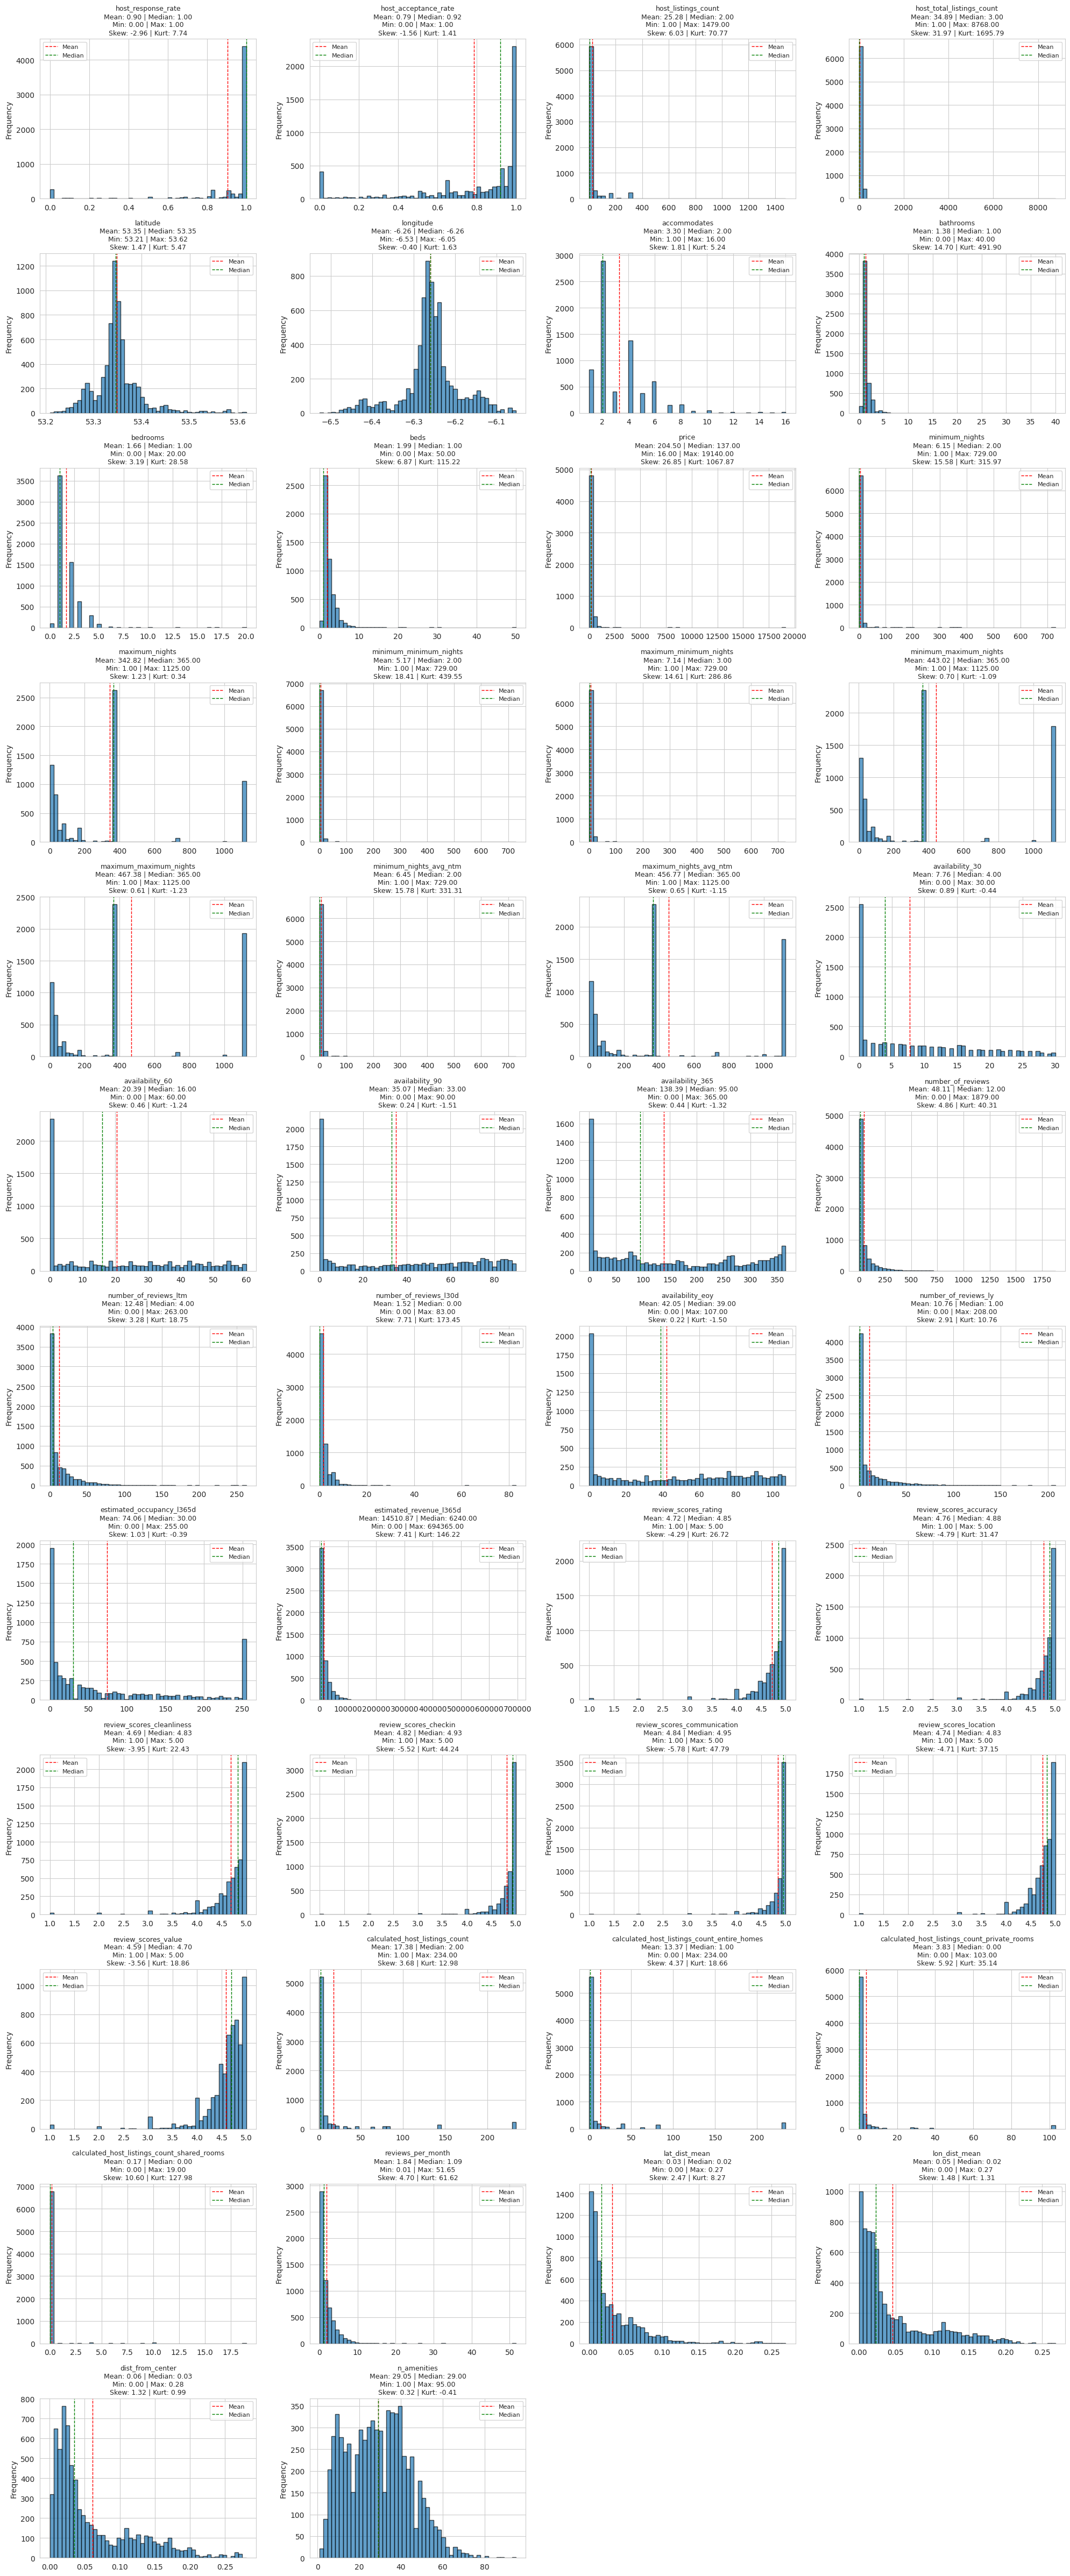

In [47]:
# Usuń boolean_columns i serial z numerical_cols
serial_cols = [col for col in data.columns if 'id' in col.lower()]
pure_numerical_cols = [col for col in numerical_cols if col not in boolean_columns
                       if col not in serial_cols]

print(f"Pure numerical columns (without boolean): {len(pure_numerical_cols)}")
print(f"Boolean columns: {len(boolean_columns)}")
print(f"Date columns: {len(date_columns)}")
print(f"Categorical columns: {len(categorical_cols)}")
print("="*80)

print("\n1. Numeric Variables (excluding boolean)")
print("="*80)

# Oblicz skośność i kurtozę
pd.options.display.float_format = '{:.2f}'.format

numerical_stats = pd.DataFrame({
    'skewness': data[pure_numerical_cols].skew(),
    'kurtosis': data[pure_numerical_cols].kurt(),
    'mean': data[pure_numerical_cols].mean(),
    'median': data[pure_numerical_cols].median()
}).round(2)

# Wizualizacja histogramów
n_cols = 4
n_rows = int(np.ceil(len(pure_numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(pure_numerical_cols):
    ax = axes[idx]

    # Usuń NaN
    col_data = data[col].dropna()

    # Histogram
    ax.hist(col_data, bins=50, edgecolor='black', alpha=0.7)

    # Statystyki
    skew = col_data.skew()
    kurt = col_data.kurtosis()
    mean_val = col_data.mean()
    median_val = col_data.median()
    min_val = col_data.min()
    max_val = col_data.max()

    # Tytuł z rozszerzonymi statystykami
    ax.set_title(
        f'{col}\n'
        f'Mean: {mean_val:.2f} | Median: {median_val:.2f}\n'
        f'Min: {min_val:.2f} | Max: {max_val:.2f}\n'
        f'Skew: {skew:.2f} | Kurt: {kurt:.2f}',
        fontsize=9
    )
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

    # Dodaj linię średniej
    ax.axvline(col_data.mean(), color='red', linestyle='--', linewidth=1, label='Mean')
    ax.axvline(col_data.median(), color='green', linestyle='--', linewidth=1, label='Median')
    ax.legend(fontsize=8)

# Usuń puste subploty
for idx in range(len(pure_numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

In [48]:
# Sortuj i wydrukuj
print(numerical_stats.sort_values('skewness', ascending=False))

                                              skewness  kurtosis     mean  median
host_total_listings_count                        31.97   1695.79    34.89    3.00
price                                            26.85   1067.87   204.50  137.00
minimum_minimum_nights                           18.41    439.55     5.17    2.00
minimum_nights_avg_ntm                           15.78    331.31     6.45    2.00
minimum_nights                                   15.58    315.97     6.15    2.00
bathrooms                                        14.70    491.90     1.38    1.00
maximum_minimum_nights                           14.61    286.86     7.14    3.00
calculated_host_listings_count_shared_rooms      10.60    127.98     0.17    0.00
number_of_reviews_l30d                            7.71    173.45     1.52    0.00
estimated_revenue_l365d                           7.41    146.22 14510.87 6240.00
beds                                              6.87    115.22     1.99    1.00
host_listings_co

#### Podsumowanie

In [49]:
# Podsumowanie skośności i kurtozy

print("\n\n" + "="*80)
print("Podsumowanie dystrybucji")
print("="*80)

print("\n Zmienne o wysokiej skośności (|skewness| > 2):")
highly_skewed = numerical_stats[abs(numerical_stats['skewness']) > 2].sort_values('skewness', ascending=False)
print(highly_skewed)

print("\n Zmienne o wysokiej kurtozie (kurtosis > 5):")
high_kurtosis = numerical_stats[numerical_stats['kurtosis'] > 5].sort_values('kurtosis', ascending=False)
print(high_kurtosis)



Podsumowanie dystrybucji

 Zmienne o wysokiej skośności (|skewness| > 2):
                                              skewness  kurtosis     mean  median
host_total_listings_count                        31.97   1695.79    34.89    3.00
price                                            26.85   1067.87   204.50  137.00
minimum_minimum_nights                           18.41    439.55     5.17    2.00
minimum_nights_avg_ntm                           15.78    331.31     6.45    2.00
minimum_nights                                   15.58    315.97     6.15    2.00
bathrooms                                        14.70    491.90     1.38    1.00
maximum_minimum_nights                           14.61    286.86     7.14    3.00
calculated_host_listings_count_shared_rooms      10.60    127.98     0.17    0.00
number_of_reviews_l30d                            7.71    173.45     1.52    0.00
estimated_revenue_l365d                           7.41    146.22 14510.87 6240.00
beds                  

### '2. Boolean columns

2. Boolean Variables
['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'calendar_updated', 'has_availability', 'license', 'instant_bookable', 'is_smoke_alarm', 'is_wifi', 'is_kitchen', 'is_hot_water', 'is_carbon_monoxide_alarm', 'property_Entire_home', 'property_Entire_rental_unit', 'property_Private_room_in_condo', 'property_Private_room_in_home', 'property_Private_room_in_rental_unit', 'property_other', 'neighbourhood_Dublin_City', 'neighbourhood_Fingal', 'neighbourhood_South_Dublin']
Brak danych w kolumnie: neighbourhood_group_cleansed
Brak danych w kolumnie: calendar_updated
Brak danych w kolumnie: license


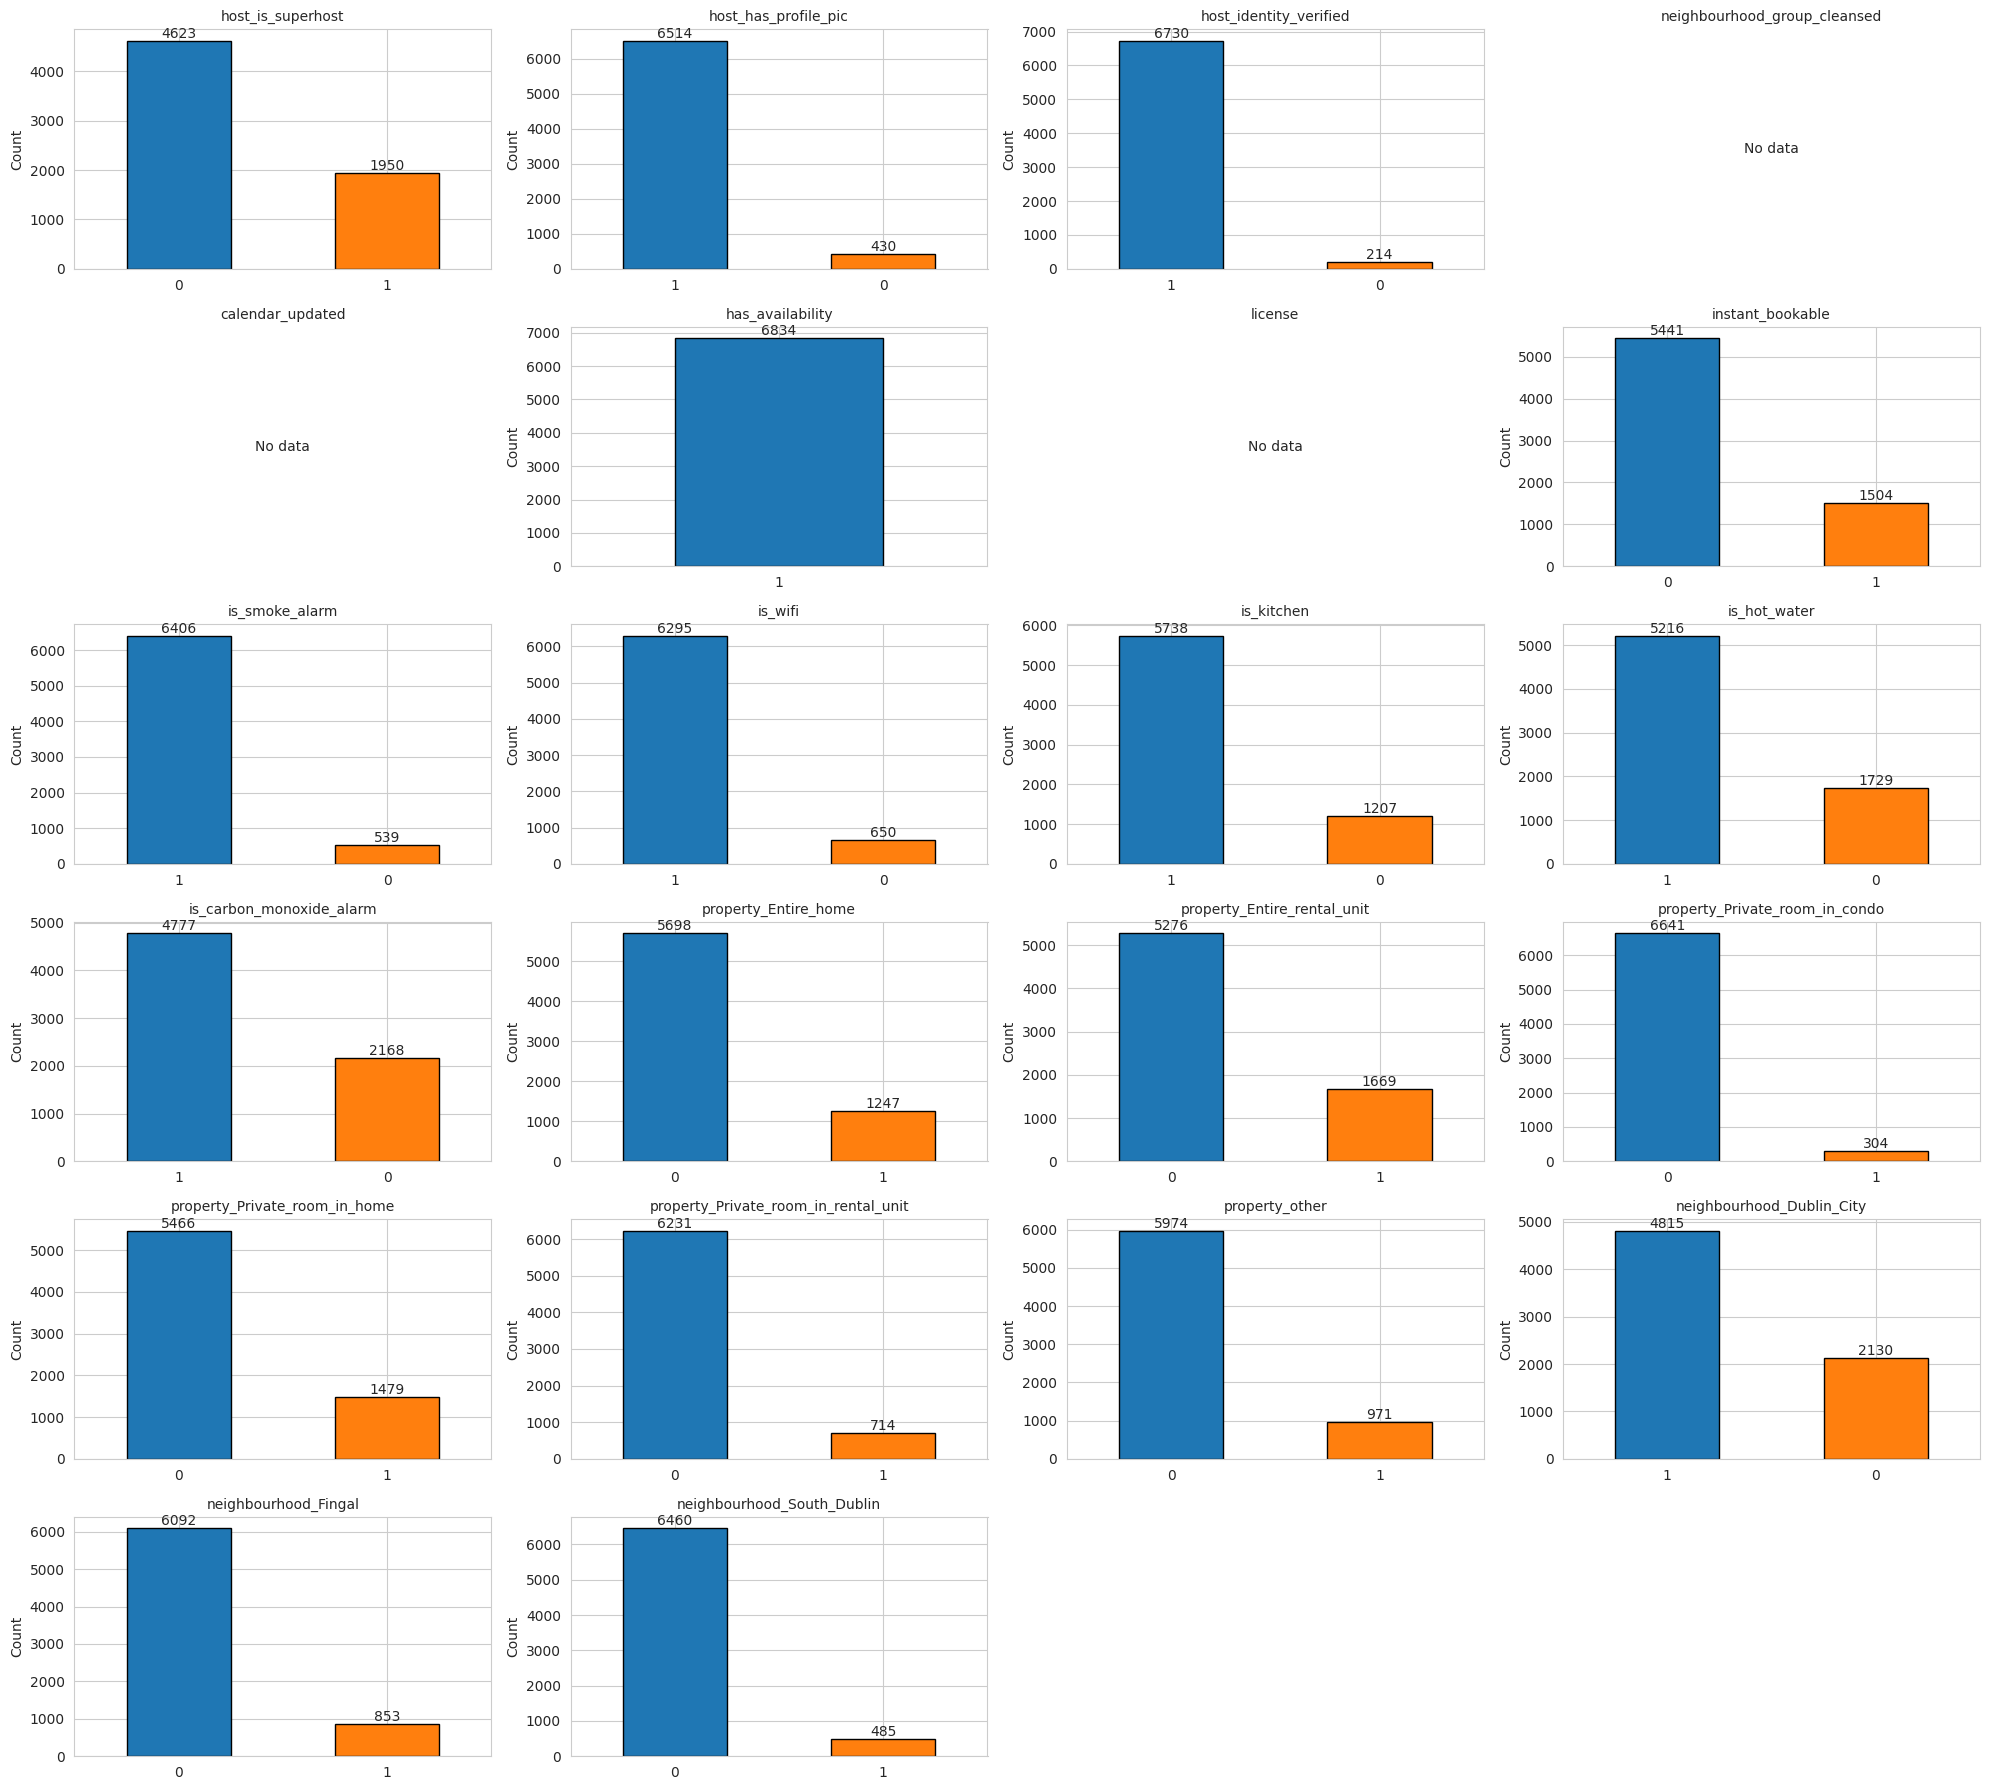

In [50]:
print("2. Boolean Variables")
print("="*80)

print(boolean_columns)
# print(data[boolean_columns].head(10))
n_cols_bool = 4
n_rows_bool = int(np.ceil(len(boolean_columns) / n_cols_bool))

fig, axes = plt.subplots(n_rows_bool, n_cols_bool, figsize=(20, n_rows_bool*3))
axes = axes.flatten()

for idx, col in enumerate(boolean_columns):
    ax = axes[idx]

    # Zlicz wartości
    value_counts = data[col].value_counts()

    # Sprawdź czy są jakieś wartości
    if len(value_counts) == 0:
        print(f"Brak danych w kolumnie: {col}")
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{col}', fontsize=10)
        ax.axis('off')
        continue

    # Bar plot
    value_counts.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
    ax.set_title(f'{col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

    # Dodaj wartości na słupkach
    for i, v in enumerate(value_counts):
        ax.text(i, v, str(v), ha='center', va='bottom')

# Usuń puste subploty
for idx in range(len(boolean_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('boolean_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

In [51]:
# Dystrybucja boolean
print(f"Boolean variables distribution:")
for col in boolean_columns:
    # print(f"\n{col}:")
    print("\n-->",data[col].value_counts(), (f"  1-0 ratio % : {(data[col].sum() / data[col].count() * 100):.2f}%"))

Boolean variables distribution:

--> host_is_superhost
0    4623
1    1950
Name: count, dtype: Int64   1-0 ratio % : 29.67%

--> host_has_profile_pic
1    6514
0     430
Name: count, dtype: Int64   1-0 ratio % : 93.81%

--> host_identity_verified
1    6730
0     214
Name: count, dtype: Int64   1-0 ratio % : 96.92%

--> Series([], Name: count, dtype: int64)   1-0 ratio % : nan%

--> Series([], Name: count, dtype: int64)   1-0 ratio % : nan%

--> has_availability
1    6834
Name: count, dtype: Int64   1-0 ratio % : 100.00%

--> Series([], Name: count, dtype: int64)   1-0 ratio % : nan%

--> instant_bookable
0    5441
1    1504
Name: count, dtype: Int64   1-0 ratio % : 21.66%

--> is_smoke_alarm
1    6406
0     539
Name: count, dtype: int64   1-0 ratio % : 92.24%

--> is_wifi
1    6295
0     650
Name: count, dtype: int64   1-0 ratio % : 90.64%

--> is_kitchen
1    5738
0    1207
Name: count, dtype: int64   1-0 ratio % : 82.62%

--> is_hot_water
1    5216
0    1729
Name: count, dtype: int64

/tmp/ipython-input-2199351259.py:5: RuntimeWarning: invalid value encountered in scalar divide
  print("\n-->",data[col].value_counts(), (f"  1-0 ratio % : {(data[col].sum() / data[col].count() * 100):.2f}%"))
/tmp/ipython-input-2199351259.py:5: RuntimeWarning: invalid value encountered in scalar divide
  print("\n-->",data[col].value_counts(), (f"  1-0 ratio % : {(data[col].sum() / data[col].count() * 100):.2f}%"))


### '3. Date columns

3. Date columns


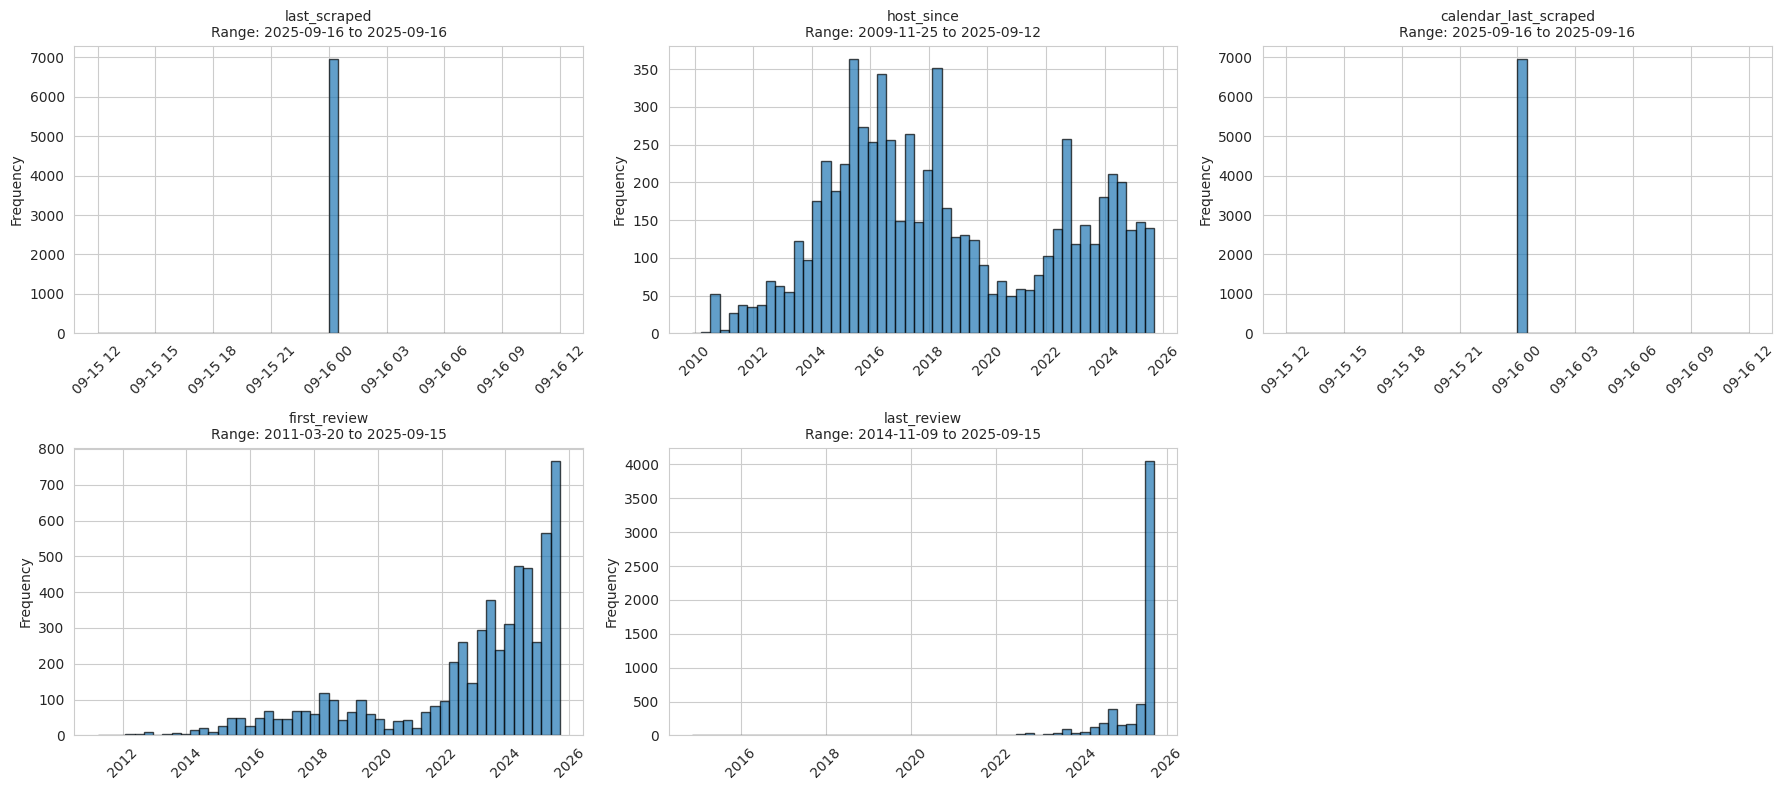

In [52]:
print("3. Date columns")
print("="*80)

n_cols_date = 3
n_rows_date = int(np.ceil(len(date_columns) / n_cols_date))

fig, axes = plt.subplots(n_rows_date, n_cols_date, figsize=(18, n_rows_date*4))
axes = axes.flatten()

for idx, col in enumerate(date_columns):
    ax = axes[idx]

    # Usuń NaN i sortuj
    col_data = data[col].dropna().sort_values()

    if len(col_data) > 0:
        # Histogram dat
        ax.hist(col_data, bins=50, edgecolor='black', alpha=0.7)
        ax.set_title(f'{col}\nRange: {col_data.min().date()} to {col_data.max().date()}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)

# Usuń puste subploty
for idx in range(len(date_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('date_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

In [53]:
# Podsumowanie statystyk dla dat
for idx, col in enumerate(date_columns):
    ax = axes[idx]

    # Statystyki
    print(f"{col}:")
    print(f"  Min: {col_data.min()}")
    print(f"  Max: {col_data.max()}")
    print(f"  Missing: {data[col].isnull().sum()} ({data[col].isnull().sum()/len(data)*100:.2f}%)\n")


last_scraped:
  Min: 2014-11-09 00:00:00
  Max: 2025-09-15 00:00:00
  Missing: 0 (0.00%)

host_since:
  Min: 2014-11-09 00:00:00
  Max: 2025-09-15 00:00:00
  Missing: 1 (0.01%)

calendar_last_scraped:
  Min: 2014-11-09 00:00:00
  Max: 2025-09-15 00:00:00
  Missing: 0 (0.00%)

first_review:
  Min: 2014-11-09 00:00:00
  Max: 2025-09-15 00:00:00
  Missing: 1042 (15.00%)

last_review:
  Min: 2014-11-09 00:00:00
  Max: 2025-09-15 00:00:00
  Missing: 1042 (15.00%)



## '4. Categorical columns

Original categorical columns: 21
Filtered categorical columns: 8
Removed: ['host_about', 'name', 'description', 'neighborhood_overview', 'amenities', 'neighbourhood_cleansed', 'source', 'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'amenities_parsed', 'host_verifications']

Filtered list: ['host_name', 'host_location', 'host_response_time', 'host_neighbourhood', 'neighbourhood', 'property_type', 'room_type', 'bathrooms_text']

4. Categorical variables


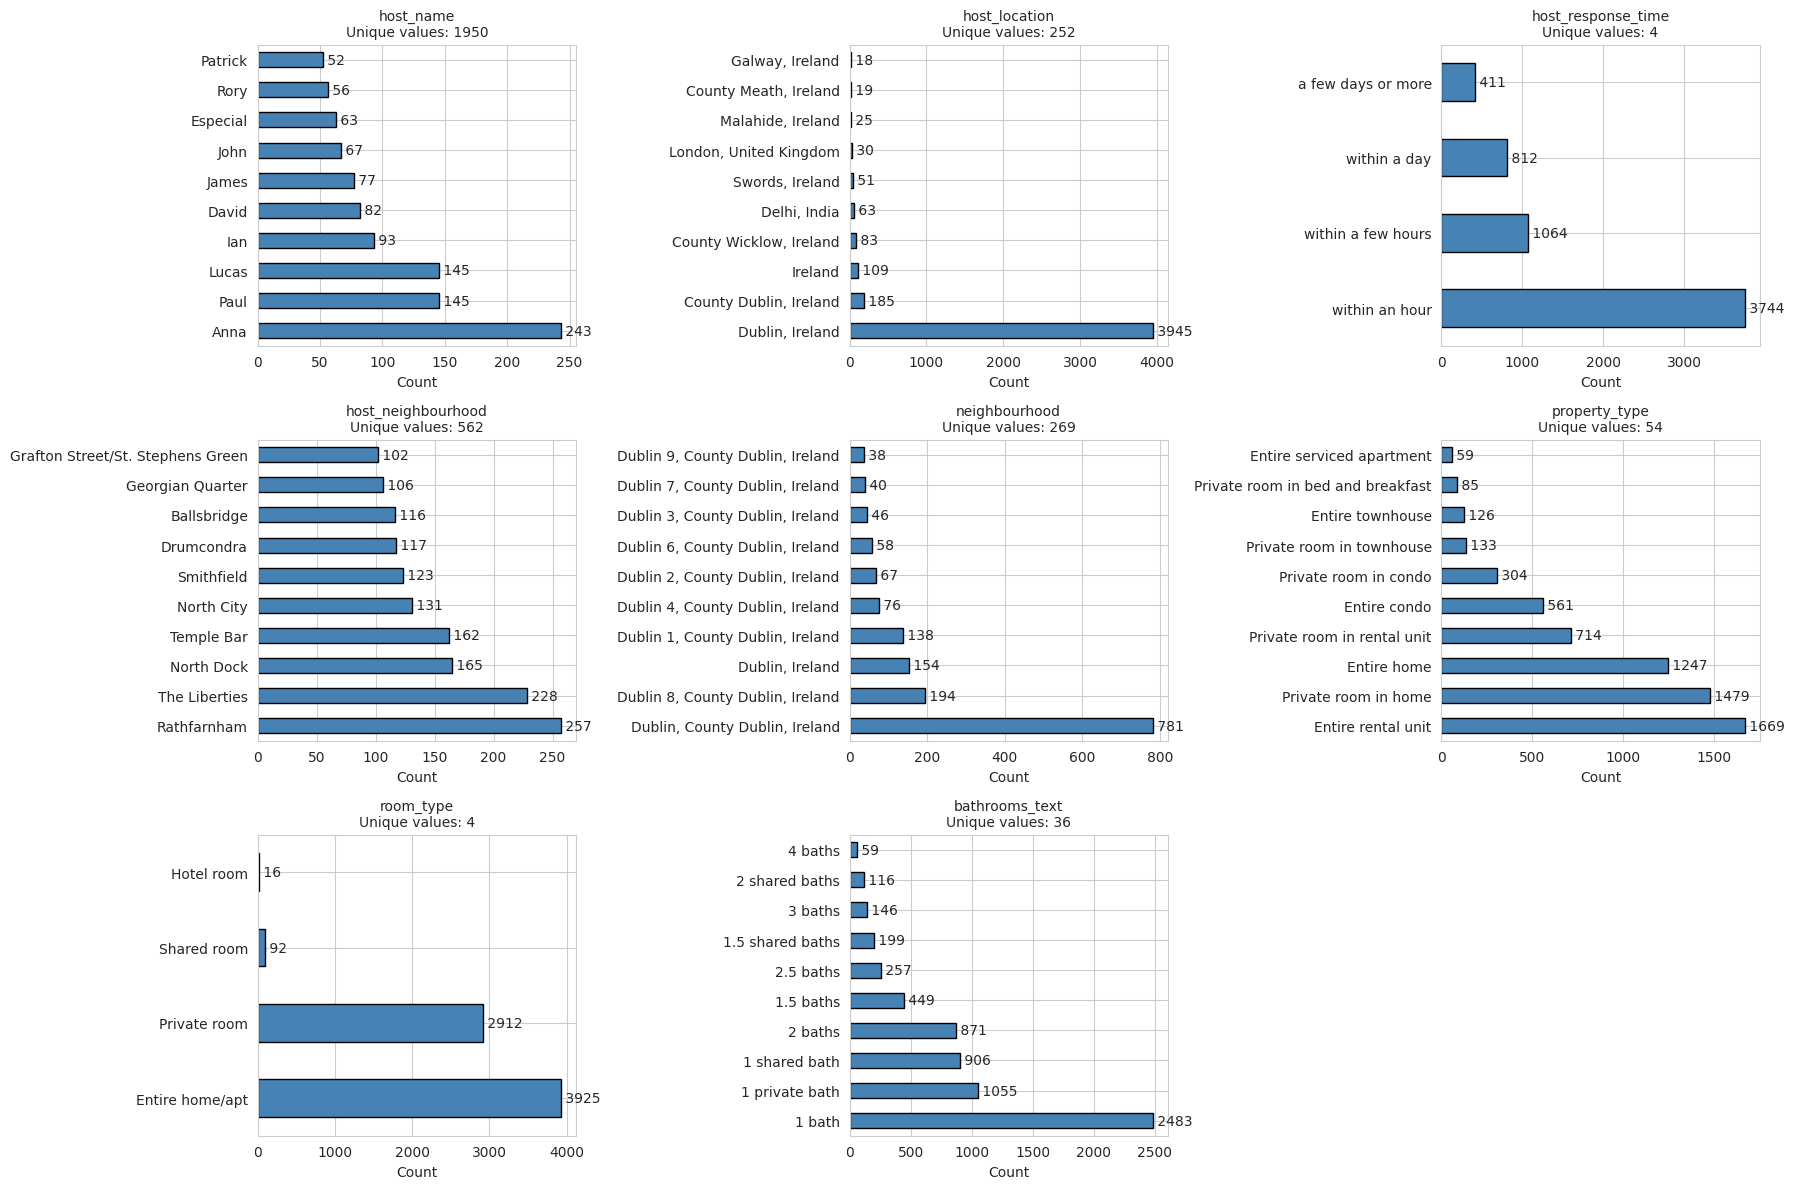

In [54]:
# Usuń kolumny tekstowe z categorical_cols
text_columns = ['host_about', 'name', 'description',
                'neighborhood_overview', 'amenities', 'neighbourhood_cleansed',
                'source']
categorical_cols_short = [col for col in categorical_cols if col not in text_columns]

# Dodatkowo usuń kolumny które zawierają listy lub są URL-ami
exclude_lists = ['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url',
                     'host_picture_url', 'amenities_parsed', 'host_verifications']

categorical_cols_short = [col for col in categorical_cols_short if col not in exclude_lists]

print(f"Original categorical columns: {len(categorical_cols)}")
print(f"Filtered categorical columns: {len(categorical_cols_short)}")
print(f"Removed: {text_columns + exclude_lists}")
print(f"\nFiltered list: {categorical_cols_short}")

# CATEGORICAL VARIABLES
print("\n4. Categorical variables")
print("="*80)

# Top 10 wartości dla każdej zmiennej kategorycznej
n_cols_cat = 3
n_rows_cat = int(np.ceil(len(categorical_cols_short) / n_cols_cat))

fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(18, n_rows_cat*4))
axes = axes.flatten()


for idx, col in enumerate(categorical_cols_short):
    ax = axes[idx]

    # Top 10 wartości
    top_values = data[col].value_counts().head(10)

    # Bar plot
    top_values.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'{col}\nUnique values: {data[col].nunique()}', fontsize=10)
    ax.set_xlabel('Count')
    ax.set_ylabel('')

    # Dodaj wartości na słupkach
    for i, v in enumerate(top_values):
        ax.text(v, i, f' {v}', va='center')


# Usuń puste subploty
for idx in range(len(categorical_cols_short), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

In [55]:

for idx, col in enumerate(categorical_cols_short):
    ax = axes[idx]

    print(f"\n--> {col}:")
    print(f"  Unique values: {data[col].nunique()}")
    print(f"  Missing: {data[col].isnull().sum()} ({data[col].isnull().sum()/len(data)*100:.2f}%)")
    print(f"  Top 5 values:")
    print(top_values.head(5))


--> host_name:
  Unique values: 1950
  Missing: 1 (0.01%)
  Top 5 values:
bathrooms_text
1 bath            2483
1 private bath    1055
1 shared bath      906
2 baths            871
1.5 baths          449
Name: count, dtype: int64

--> host_location:
  Unique values: 252
  Missing: 1802 (25.95%)
  Top 5 values:
bathrooms_text
1 bath            2483
1 private bath    1055
1 shared bath      906
2 baths            871
1.5 baths          449
Name: count, dtype: int64

--> host_response_time:
  Unique values: 4
  Missing: 914 (13.16%)
  Top 5 values:
bathrooms_text
1 bath            2483
1 private bath    1055
1 shared bath      906
2 baths            871
1.5 baths          449
Name: count, dtype: int64

--> host_neighbourhood:
  Unique values: 562
  Missing: 1410 (20.30%)
  Top 5 values:
bathrooms_text
1 bath            2483
1 private bath    1055
1 shared bath      906
2 baths            871
1.5 baths          449
Name: count, dtype: int64

--> neighbourhood:
  Unique values: 269
  Missi

# '8. DATA CLEANING

## Price - outliers removal

LIKWIDACJA OUTLIERÓW, po co?

Słabo modelują dane.

Odcięcie 99, 98, 95 percentyla - ok.
Podobnie odcięcie 1,2,5 percentyla.

**Ogranicza od razu cały zbiór danych - po co przerabiać dane, które będziemy i tak usuwać. **

In [56]:
print(f"Kolumna 'price' ma: {data.price.describe()['count']} rekordów spośród {data.shape[0]} wierszy")
print(f"Kolumna 'price' jest kluczowa do modelowania i nie może mieć braków - usuwanie pustych.")

# Usuń wiersze z brakującymi danymi
data.dropna(subset=['price'], inplace=True)
# Opcjonalnie - wyświetl informacje o usuniętych wierszach
print(f"Rozmiar data po usunięciu braków: {data.shape}")

all_data=data.copy()

data.price.describe()

Kolumna 'price' ma: 5244.0 rekordów spośród 6945 wierszy
Kolumna 'price' jest kluczowa do modelowania i nie może mieć braków - usuwanie pustych.
Rozmiar data po usunięciu braków: (5244, 97)


count    5244.00
mean      204.50
std       400.98
min        16.00
25%        89.00
50%       137.00
75%       232.00
max     19140.00
Name: price, dtype: float64

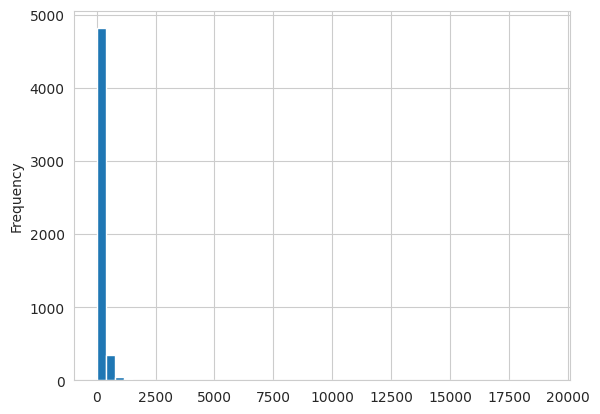

In [57]:
# Mamy outliery które trzeba koniecznie usunąć
data.price.plot.hist(bins=50)
plt.show()

In [58]:
# Getting rid of outliers
data = all_data.copy()
threshold_top=(np.percentile(data.price, 95))
threshold_bottom=(np.percentile(data.price, 5))
print("95% properties have a price lower than {0: .2f}".format(threshold_top))
print("95% properties have a price higher than {0: .2f}".format(threshold_bottom))
data_cut = data[(data.price <= threshold_top) & (data.price > threshold_bottom)]
all_data = data.copy()
data = data_cut.copy()
print(data.shape)

95% properties have a price lower than  489.00
95% properties have a price higher than  55.00
(4714, 97)


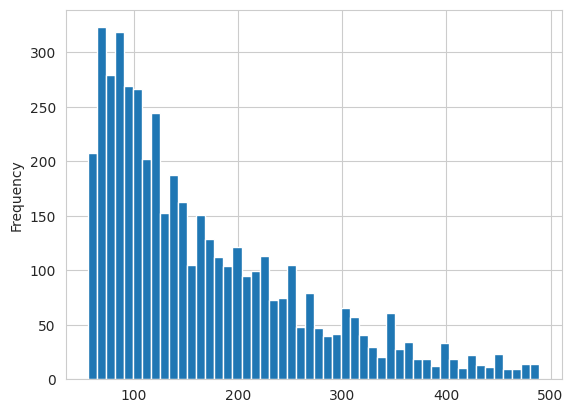

In [59]:
# po usunięciu outlierów
data.price.plot.hist(bins=50)
plt.show()

In [60]:
data.price.describe()

count   4714.00
mean     167.79
std       96.05
min       56.00
25%       92.00
50%      137.00
75%      221.00
max      489.00
Name: price, dtype: float64

## Zastępowanie braków
Zastąpienie brakujących danych:
* dane numeryczne - zastąpienie średnią
* dane kategoryczne - zastąpienie najczęściej występującą



In [61]:
# Usuwa kolumny całkowicie puste
data = data.dropna(axis=1, how='all')
print(data.shape)

(4714, 94)


In [62]:
from sklearn.impute import SimpleImputer

numeric_cols     = data.select_dtypes(include=['number']).columns
date_cols     = data.select_dtypes(include=['datetime64']).columns

numeric_imputer     = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to numeric columns
data[numeric_cols]     = numeric_imputer.fit_transform(data[numeric_cols])
# data[categorical_cols_short] = categorical_imputer.fit_transform(data[categorical_cols_short])
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

for col in date_cols:
    data[col].fillna(pd.Timestamp('2026-01-01'), inplace=True) # konkretna data

/tmp/ipython-input-3104247215.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(pd.Timestamp('2026-01-01'), inplace=True) # konkretna data


## Weryfikacja obecności braków

In [63]:
# Sprawdzenie braków
missing = pd.DataFrame({
    'Missing_Count': data.isnull().sum(),
    'Percent': (data.isnull().sum() / len(data)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
missing['Percent'] = missing['Percent'].apply(lambda x: f'{x:.2f}%')

print(missing)

Empty DataFrame
Columns: [Missing_Count, Percent]
Index: []


In [64]:
data.head(5).T

0                                                  3                                                  7                                                  8                                                  9
id                                                                                     44077.00                                          162809.00                                          292757.00                                          302554.00                                          302634.00
listing_url                                                  https://www.airbnb.com/rooms/44077                https://www.airbnb.com/rooms/162809                https://www.airbnb.com/rooms/292757                https://www.airbnb.com/rooms/302554                https://www.airbnb.com/rooms/302634
scrape_id                                                                     20250916040708.00                                  20250916040708.00                                  20250916040708.00                                  20250916040708.00                                  20250916040708.00
last_scraped                                                                2025-09-16 00:00:00                                2025-09-16 00:00:00                                2025-09-16 00:00:00                                2025-09-16 00:00:00                                2025-09-16 00:00:00
source                                                                              city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape
name                                                        cosy comfortable Irish cottage twin                 5.5 miles south of Dublin City :^)    Old World Converted Stables with Swimming Pool.        Peaceful retreat for 5 - excellent location    Studio sleeps 2 city ctr 10 mins - Molly Malone
description                                   Our house is a cosy comfortable cottage  with ...  A nice place to relax after the bustle of the ...  The following is what past guests have said th...  This apartment is quiet and peaceful and is a ...  We call this the Molly Malone studio which is ...
neighborhood_overview                         I like our neighbourhood as there is no shorta...  Close to the sea, hill walks and the city - vi...  Our house is located at the gate of the famous...  This street is a beautifully tree lined street...  This street is a beautifully tree lined street...
picture_url                                   https://a0.muscache.com/pictures/525706/050a3a...  https://a0.muscache.com/pictures/86694529/c07b...  https://a0.muscache.com/pictures/c0f316d1-c7f1...  https://a0.muscache.com/pictures/3c1a66d6-ffc1...  https://a0.muscache.com/pictures/10910884/fac3...
host_id                                                                               193005.00                                          777681.00                                         1515549.00                                         1557844.00                                         1557844.00
host_url                                               https://www.airbnb.com/users/show/193005           https://www.airbnb.com/users/show/777681          https://www.airbnb.com/users/show/1515549          https://www.airbnb.com/users/show/1557844          https://www.airbnb.com/users/show/1557844
host_name                                                                                Teresa                                             Robbie                                              Sarah                                     Liam And Fiona                                     Liam And Fiona
host_since                                                                  2010-08-06 00:00:00                                2011-07-04 00:00:00                                2011-12-18 00:00

# '9. WYKRESY KORELACJI



## Wykresy korelacji Pearsona dla zmiennych numerycznych

In [65]:
# Wykluczamy te zmienne - nie są ciekawe lub mają długie nazwy
exclude_vars = ['id', 'scrape_id', 'host_id', 'minimum_minimum_nights', 'maximum_minimum_nights',
                'minimum_maximum_nights', 'maximum_maximum_nights',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability']

# Wybiera zmienne numeryczne (bez dat) i wyklucza określone kolumny
numeric_cols = [col for col in data.select_dtypes(include=['number']).columns
                if col not in exclude_vars]

# numeric_cols = data.select_dtypes(include=['number']).columns

print(f"Number of numeric variables: {len(numeric_cols)}")
print(f"Numeric columns: {list(numeric_cols)}")

Number of numeric variables: 58
Numeric columns: ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'lat_dist_me

### '1. MACIERZ KORELACJI PEARSONA

In [66]:
correlation_matrix = data[numeric_cols].corr(method='pearson')

print("\n" + "="*80)
print("CORRELATION MATRIX (Pearson)")
print("="*80)
print(correlation_matrix)

# Znajdź najsilniejsze korelacje (bez diagonali)
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append((col1, col2, corr_value))

# Sortuj po wartości bezwzględnej
correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True)

print("\n" + "="*80)
print("TOP 20 STRONGEST CORRELATIONS")
print("="*80)
for col1, col2, corr in correlation_pairs_sorted[:20]:
    print(f"{col1:40s} <-> {col2:40s}: {corr:7.4f}")


CORRELATION MATRIX (Pearson)
                                              host_response_rate  host_acceptance_rate  host_is_superhost  host_listings_count  host_total_listings_count  host_has_profile_pic  host_identity_verified  latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month  lat_dist_mean  lon_dist_mean  dist_from_center  n_amenities  is_sm

### '2. HEATMAPA KORELACJI PEARSONA

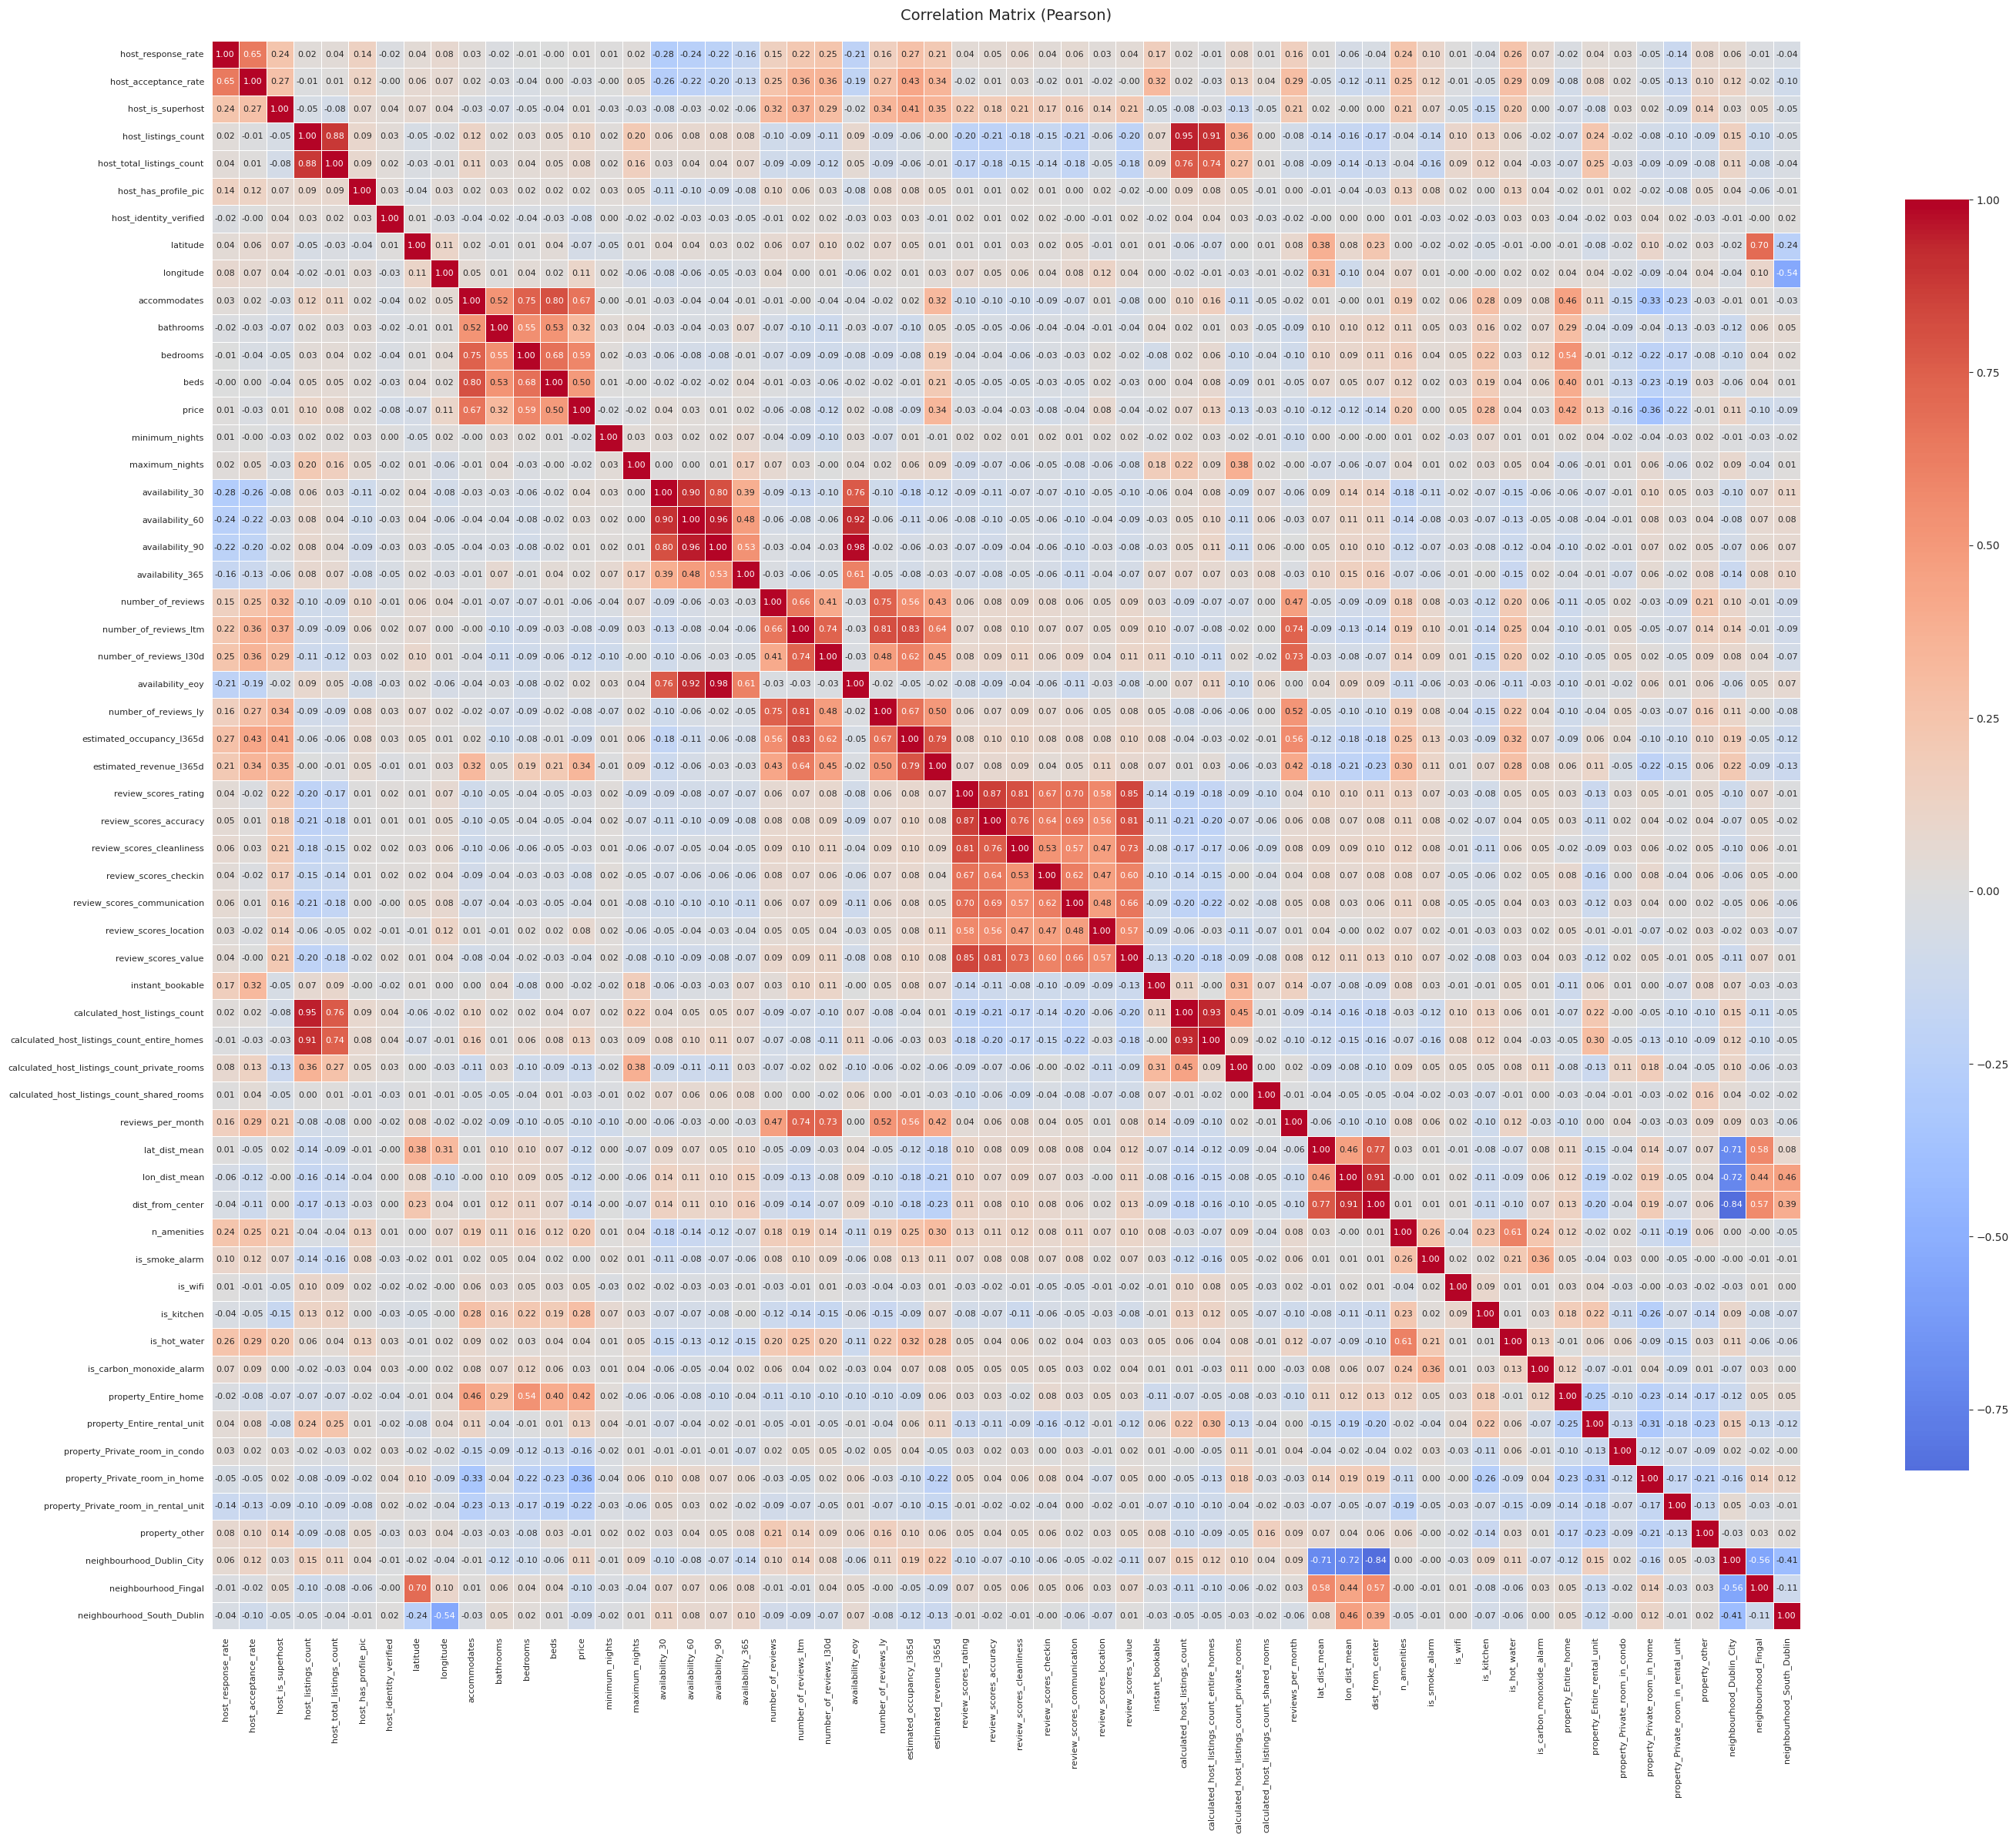

In [67]:
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix,
            annot=True,  # Pokaż wartości
            fmt='.2f',   # Format 2 miejsca po przecinku
            cmap='coolwarm',  # Kolor: czerwony = pozytywna, niebieski = negatywna
            center=0,    # Wyśrodkuj skalę na 0
            square=True, # Kwadratowe komórki
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})

plt.title('Correlation Matrix (Pearson)', fontsize=14, pad=20)
plt.xticks(fontsize=8)  # Etykiety osi X
plt.yticks(fontsize=8)  # Etykiety osi Y
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipython-input-815604645.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


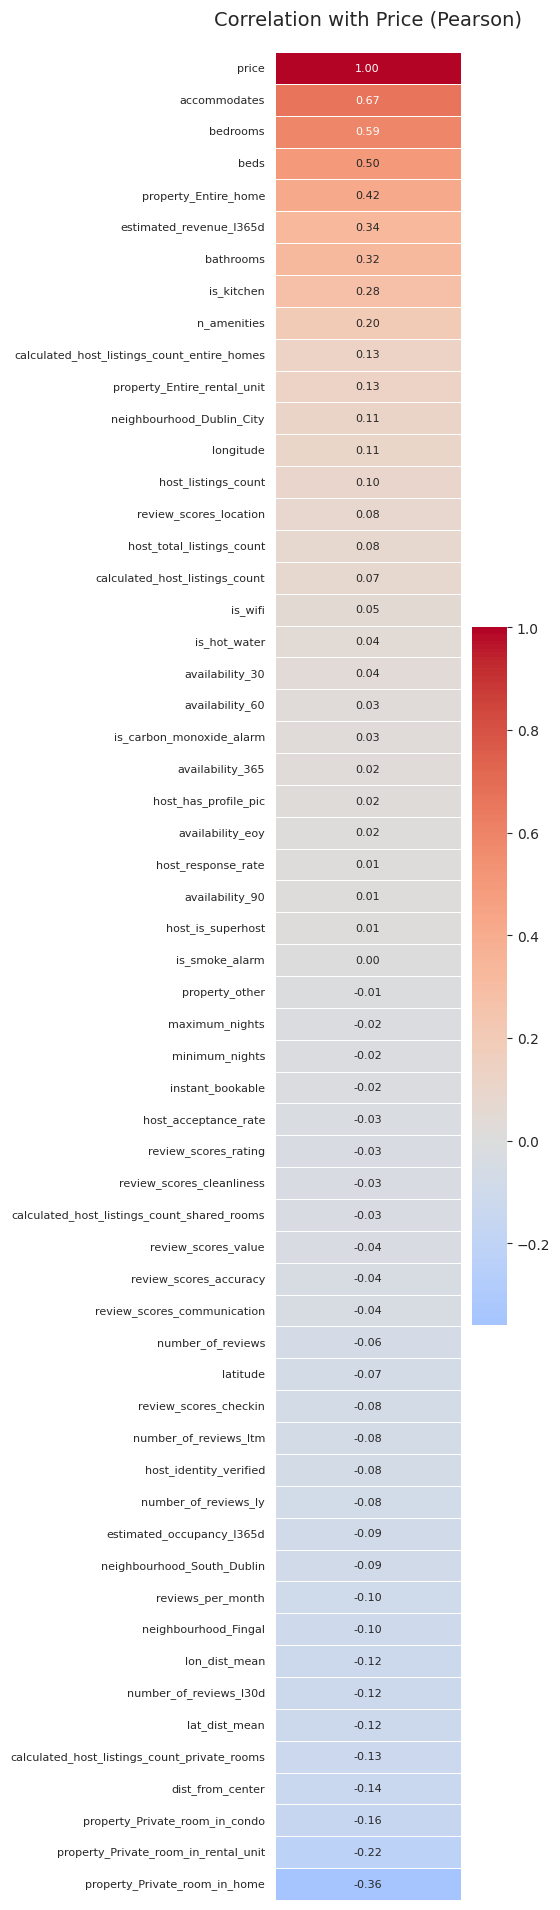

In [77]:
# Pobierz korelacje dla price i posortuj
price_corr = correlation_matrix['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(3, 24))
sns.heatmap(price_corr,
            annot=True,  # Pokaż wartości
            fmt='.2f',   # Format 2 miejsca po przecinku
            cmap='coolwarm',  # Kolor: czerwony = pozytywna, niebieski = negatywna
            center=0,    # Wyśrodkuj skalę na 0
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})

plt.title('Correlation with Price (Pearson)', fontsize=14, pad=20)
plt.xlabel('')  # Usuń podpis kolumny
plt.xticks([])  # Usuń etykiety osi X
plt.yticks(fontsize=8)  # Etykiety osi Y
plt.tight_layout()
plt.savefig('price_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

### '3. PAIRPLOT - najsilniejsze dla Price


PAIRPLOT: Top variables correlated with 'price'
price                                  1.00
accommodates                           0.67
bedrooms                               0.59
beds                                   0.50
property_Entire_home                   0.42
property_Private_room_in_home          0.36
estimated_revenue_l365d                0.34
bathrooms                              0.32
is_kitchen                             0.28
property_Private_room_in_rental_unit   0.22
Name: price, dtype: float64


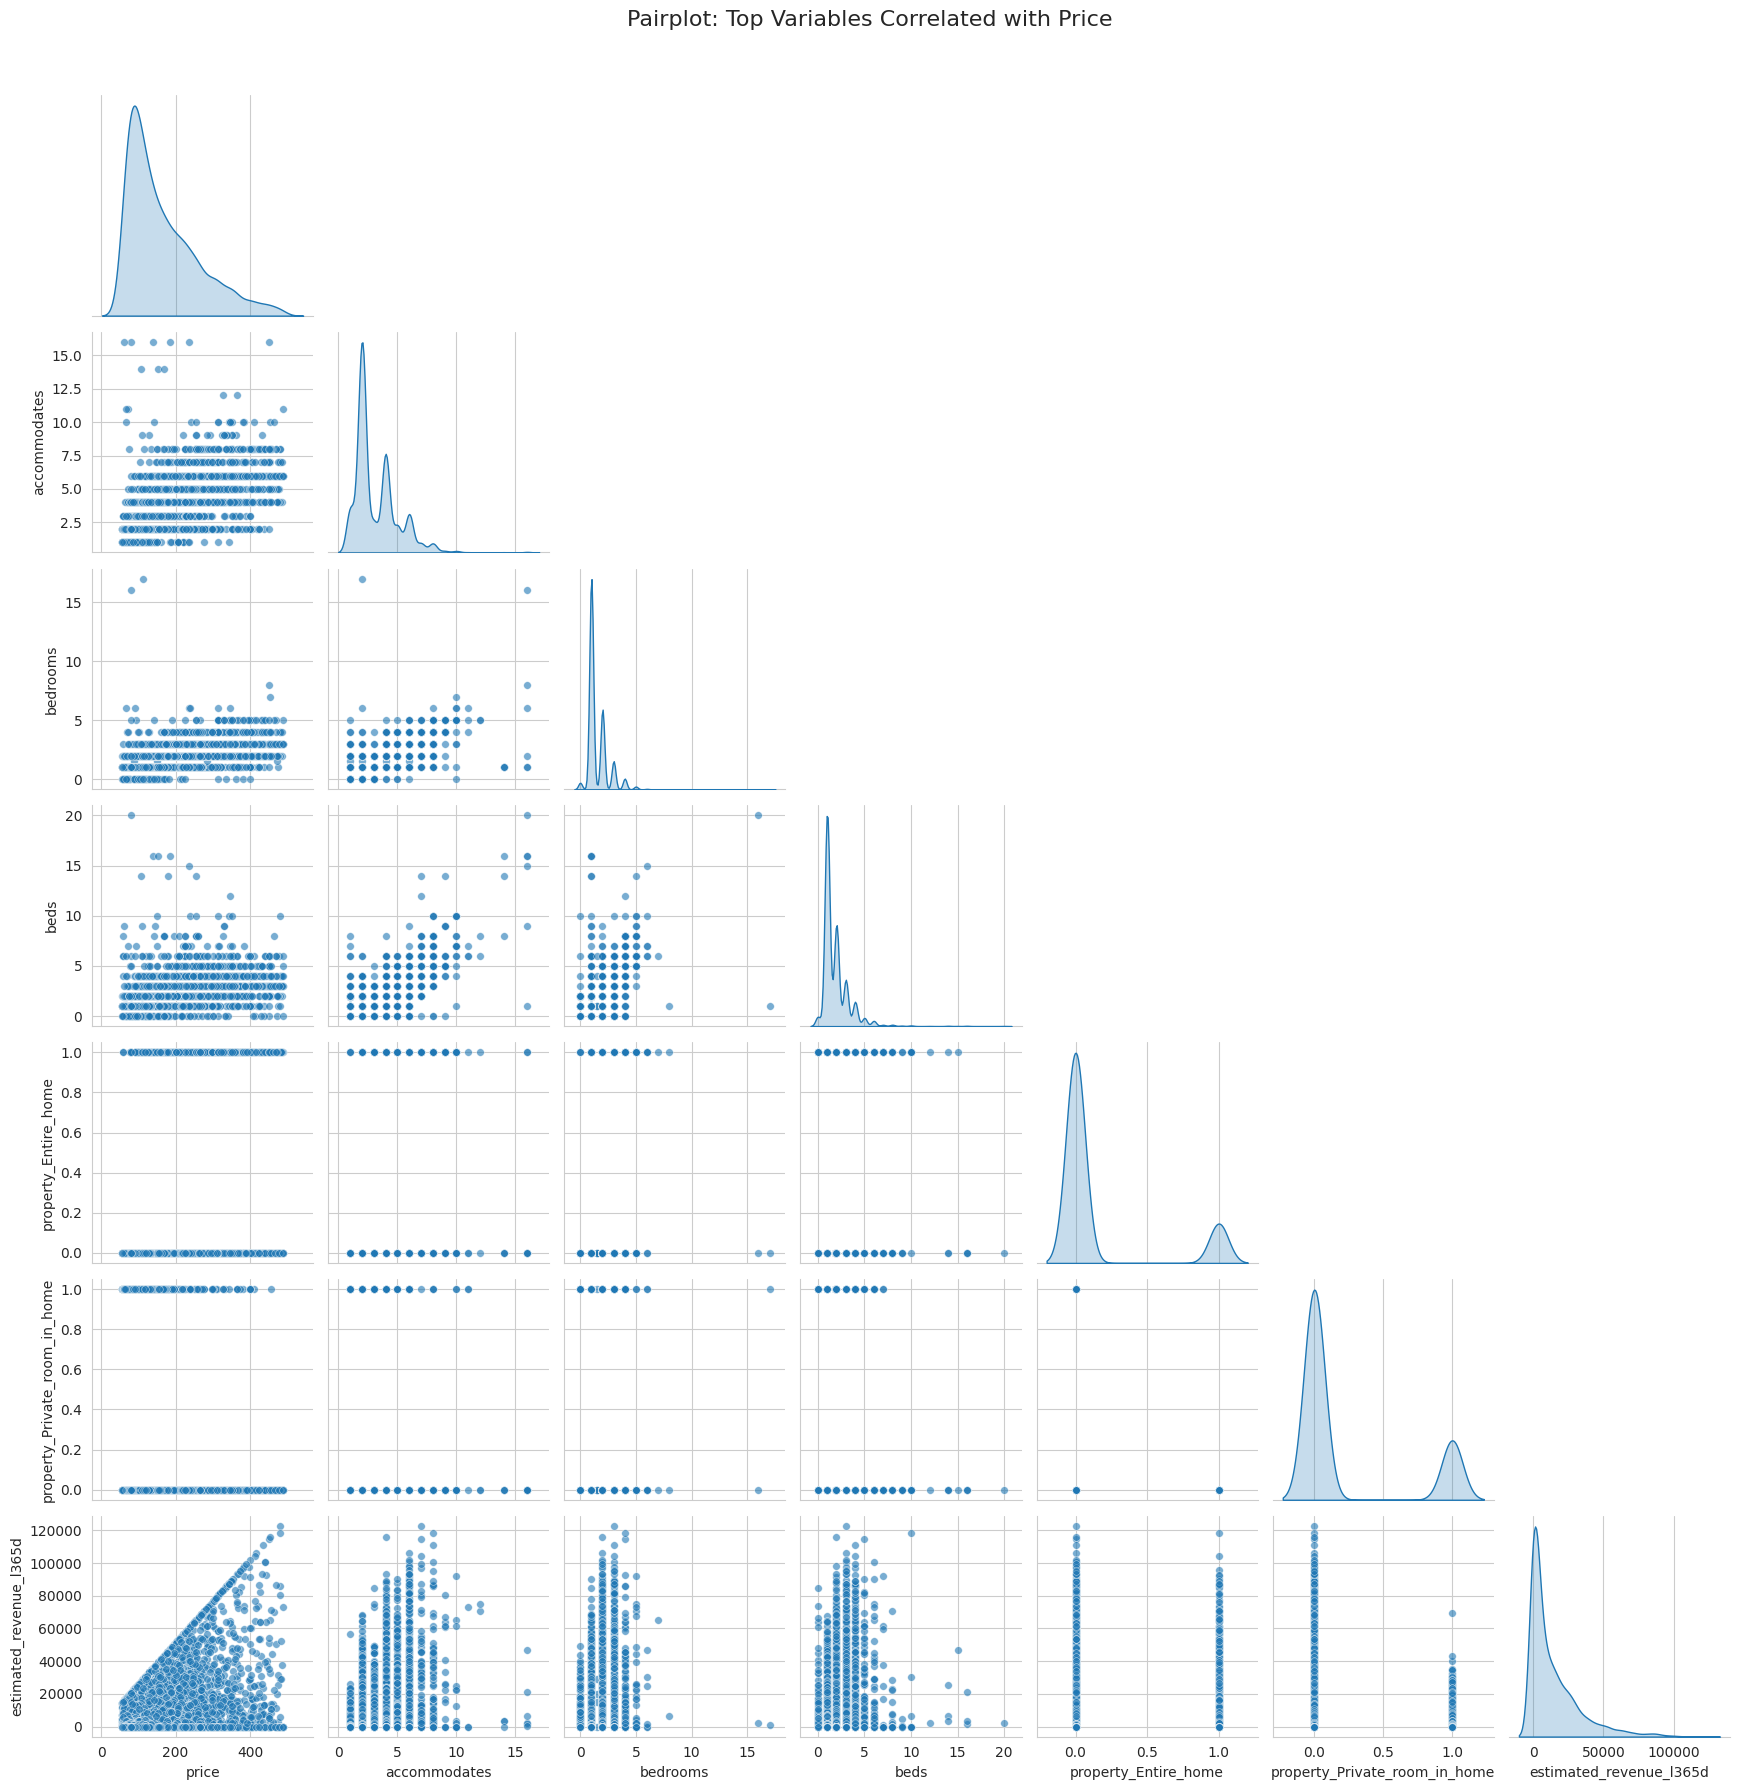

In [78]:
# Wybierz najważniejsze zmienne (np. top 6 najbardziej skorelowanych z price)
if 'price' in numeric_cols:
    # Korelacje z price
    price_correlations = correlation_matrix['price'].abs().sort_values(ascending=False)
    top_vars = price_correlations.head(7).index.tolist()  # price + 6 innych

    print("\n" + "="*80)
    print(f"PAIRPLOT: Top variables correlated with 'price'")
    print("="*80)
    print(price_correlations.head(10))

    # Pairplot
    pairplot_data = data[top_vars].copy()

    sns.pairplot(pairplot_data,
                 diag_kind='kde',  # Rozkład na diagonali
                 plot_kws={'alpha': 0.6, 's': 30},  # Przezroczystość i rozmiar punktów
                 corner=True)  # Pokaż tylko dolny trójkąt

    plt.suptitle('Pairplot: Top Variables Correlated with Price', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.savefig('pairplot_top_vars.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    # Jeśli nie ma price, wybierz 6 pierwszych zmiennych
    selected_vars = list(numeric_cols[:6])

    print("\n" + "="*80)
    print(f"PAIRPLOT: First 6 numeric variables")
    print("="*80)

    pairplot_data = data[selected_vars].copy()

    sns.pairplot(pairplot_data,
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 's': 30},
                 corner=True)

    plt.suptitle('Pairplot: Selected Numeric Variables', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.savefig('pairplot_selected_vars.png', dpi=150, bbox_inches='tight')
    plt.show()

### '4. DODATKOWA ANALIZA - Silne korelacje (|r| > 0.7)

In [80]:
print("\n" + "="*80)
print("STRONG CORRELATIONS (|r| > 0.7)")
print("="*80)
strong_corr = [(col1, col2, corr) for col1, col2, corr in correlation_pairs_sorted
               if abs(corr) > 0.7]

if strong_corr:
    for col1, col2, corr in strong_corr:
        print(f"{col1:40s} <-> {col2:43s}: {corr:7.4f}")
else:
    print("No strong correlations found (|r| > 0.7)")


STRONG CORRELATIONS (|r| > 0.7)
availability_90                          <-> availability_eoy                           :  0.9822
availability_60                          <-> availability_90                            :  0.9562
host_listings_count                      <-> calculated_host_listings_count             :  0.9476
calculated_host_listings_count           <-> calculated_host_listings_count_entire_homes:  0.9324
availability_60                          <-> availability_eoy                           :  0.9215
lon_dist_mean                            <-> dist_from_center                           :  0.9126
host_listings_count                      <-> calculated_host_listings_count_entire_homes:  0.9087
availability_30                          <-> availability_60                            :  0.9035
host_listings_count                      <-> host_total_listings_count                  :  0.8798
review_scores_rating                     <-> review_scores_accuracy                  

## Korelacja V Cramera

In [81]:
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Usuń zmienne tekstowe z categorical_cols
text_columns = ['host_about', 'name', 'description', 'neighborhood_overview', 'amenities', ]
categoric_cols_filtered = [col for col in categorical_cols_short if col not in text_columns]

print(f"Categorical columns: {len(categoric_cols_filtered)}")
print(f"Numeric columns: {len(numeric_cols)}")

Categorical columns: 8
Numeric columns: 58


### '1. V Cramera (Categorical vs Categorical)

In [82]:
def cramers_v(x, y):
    """Oblicz współczynnik V Craméra dla dwóch zmiennych kategorycznych"""
    try:
        # Konwertuj na string aby uniknąć problemów z typami
        x_str = x.astype(str)
        y_str = y.astype(str)

        # Jeśli to ta sama zmienna (porównanie ze sobą)
        if x_str.equals(y_str):
            return 1.0

        confusion_matrix = pd.crosstab(x_str, y_str)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        min_dim = min(confusion_matrix.shape) - 1
        if min_dim == 0:
            return 0
        return np.sqrt(chi2 / (n * min_dim))
    except:
        return 0

print("\n" + "="*80)
print("CRAMÉR'S V - CATEGORICAL vs CATEGORICAL")
print("="*80)

# Macierz Craméra V - zainicjalizuj z 1 na diagonali
cramers_matrix = pd.DataFrame(
    np.eye(len(categoric_cols_filtered)),  # ← 1 na diagonali, 0 poza
    index=categoric_cols_filtered,
    columns=categoric_cols_filtered
)

for i, col1 in enumerate(categoric_cols_filtered):
    print(f"Processing {col1}... ({i+1}/{len(categoric_cols_filtered)})")
    for j, col2 in enumerate(categoric_cols_filtered):
        if i < j:  # ← Tylko ponad diagonalą (i < j, nie i <= j)
            # Usuń NaN przed obliczeniem
            valid_data = data[[col1, col2]].dropna()
            if len(valid_data) > 10:  # Minimum 10 obserwacji
                v_value = cramers_v(valid_data[col1], valid_data[col2])
                cramers_matrix.loc[col1, col2] = v_value
                cramers_matrix.loc[col2, col1] = v_value  # Symetryczna macierz

print(cramers_matrix)

# Znajdź najsilniejsze zależności (bez diagonali)
cramers_pairs = []
for i in range(len(cramers_matrix.columns)):
    for j in range(i+1, len(cramers_matrix.columns)):
        col1 = cramers_matrix.columns[i]
        col2 = cramers_matrix.columns[j]
        v_value = cramers_matrix.iloc[i, j]
        cramers_pairs.append((col1, col2, v_value))

cramers_pairs_sorted = sorted(cramers_pairs, key=lambda x: x[2], reverse=True)

print("\n" + "="*80)
print("TOP 10 najsilniejszych korelacji (Cramér's V)")
print("="*80)
for col1, col2, v in cramers_pairs_sorted[:10]:
    print(f"{col1:35s} <-> {col2:35s}: {v:6.4f}")



CRAMÉR'S V - CATEGORICAL vs CATEGORICAL
Processing host_name... (1/8)
Processing host_location... (2/8)
Processing host_response_time... (3/8)
Processing host_neighbourhood... (4/8)
Processing neighbourhood... (5/8)
Processing property_type... (6/8)
Processing room_type... (7/8)
Processing bathrooms_text... (8/8)
                    host_name  host_location  host_response_time  host_neighbourhood  neighbourhood  property_type  room_type  bathrooms_text
host_name                1.00           0.71                0.76                0.72           0.58           0.65       0.87            0.56
host_location            0.71           1.00                0.26                0.46           0.30           0.29       0.21            0.27
host_response_time       0.76           0.26                1.00                0.44           0.23           0.17       0.08            0.11
host_neighbourhood       0.72           0.46                0.44                1.00           0.37           0.41  

#### Heatmapa dla Cramer V

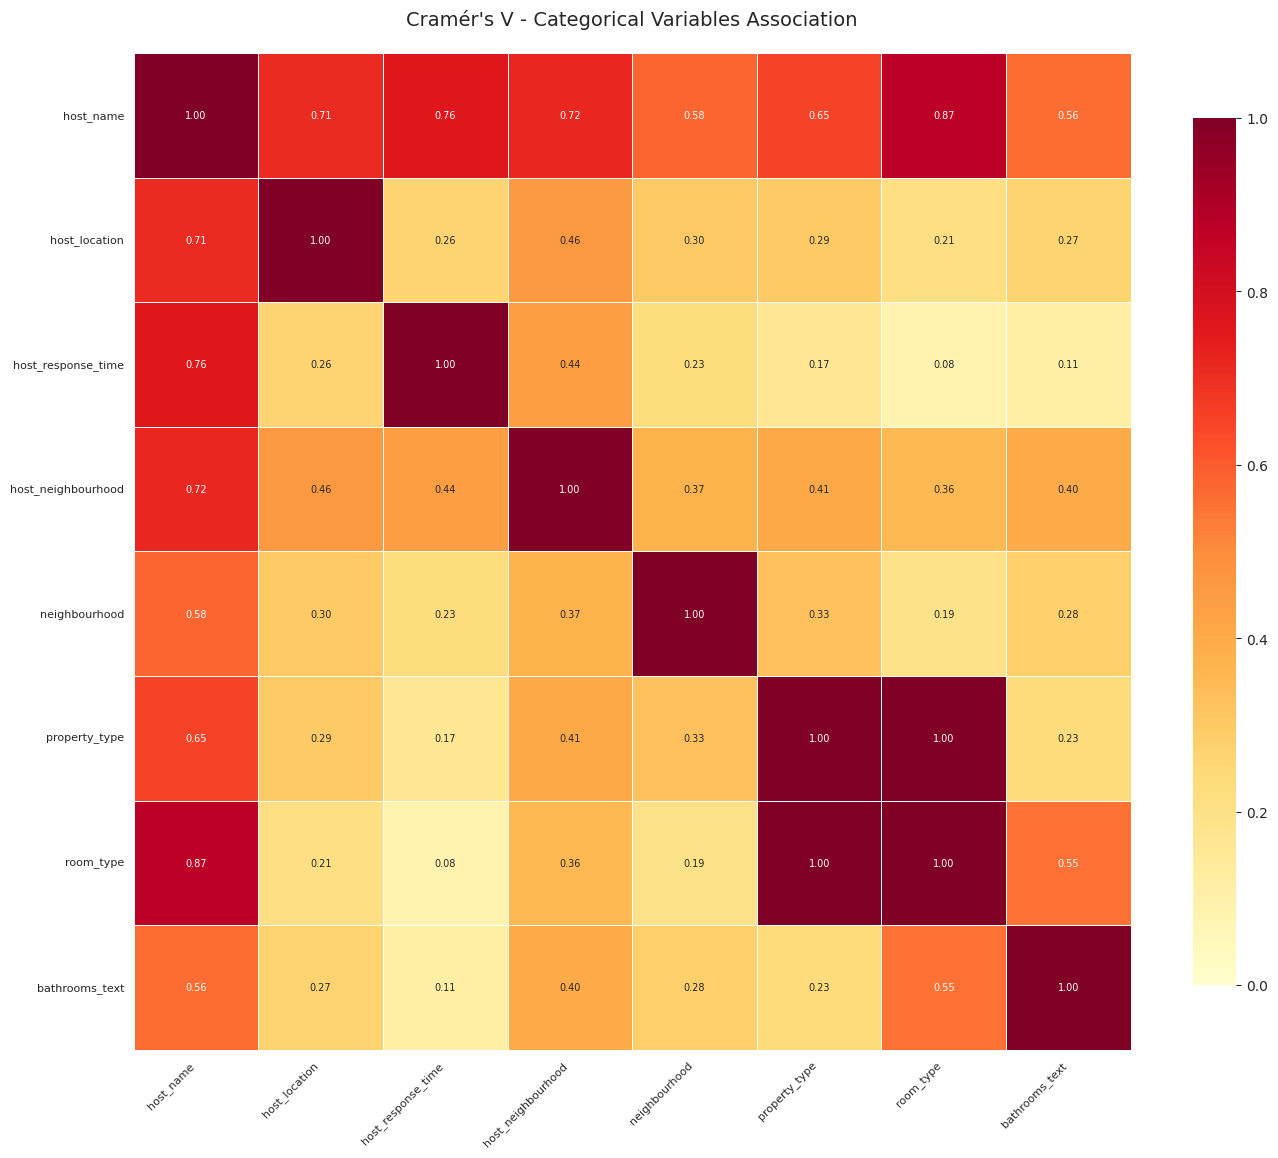

In [83]:
# Heatmapa V Cramera
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_matrix.astype(float),
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            vmin=0,
            vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 7})

plt.title("Cramér's V - Categorical Variables Association", fontsize=14, pad=20)
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('cramers_v_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

### '2. R^2 (Categorical vs Numeric)

In [73]:
print("\n" + "="*80)
print("R² - CATEGORICAL vs NUMERIC (Linear Regression)")
print("="*80)

# Macierz R²
r2_matrix = pd.DataFrame(
    np.zeros((len(categoric_cols_filtered), len(numeric_cols))),
    index=categoric_cols_filtered,
    columns=numeric_cols
)

le = LabelEncoder()

for cat_col in categoric_cols_filtered:
    print(f"Processing {cat_col}...")
    for num_col in numeric_cols:
        try:
            # Usuń NaN
            valid_data = data[[cat_col, num_col]].dropna()

            if len(valid_data) > 10:  # Minimum 10 obserwacji
                # Zakoduj zmienną kategoryczną
                X = le.fit_transform(valid_data[cat_col].astype(str)).reshape(-1, 1)
                y = valid_data[num_col].values

                # Model liniowy
                lr = LinearRegression()
                lr.fit(X, y)
                r2 = lr.score(X, y)
                r2_matrix.loc[cat_col, num_col] = max(0, r2)
        except Exception as e:
            r2_matrix.loc[cat_col, num_col] = 0

print(r2_matrix)

# Znajdź najsilniejsze zależności
r2_pairs = []
for cat_col in r2_matrix.index:
    for num_col in r2_matrix.columns:
        r2_value = r2_matrix.loc[cat_col, num_col]
        r2_pairs.append((cat_col, num_col, r2_value))

r2_pairs_sorted = sorted(r2_pairs, key=lambda x: x[2], reverse=True)


R² - CATEGORICAL vs NUMERIC (Linear Regression)
Processing host_name...
Processing host_location...
Processing host_response_time...
Processing host_neighbourhood...
Processing neighbourhood...
Processing property_type...
Processing room_type...
Processing bathrooms_text...
                    host_response_rate  host_acceptance_rate  host_is_superhost  host_listings_count  host_total_listings_count  host_has_profile_pic  host_identity_verified  latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  instant_bookable  calculated_host_listings_count  c

#### Heatmapa dla R^2 Numeric-Category


HEATMAP: R² - All Associations
Ostatni wiersz: price


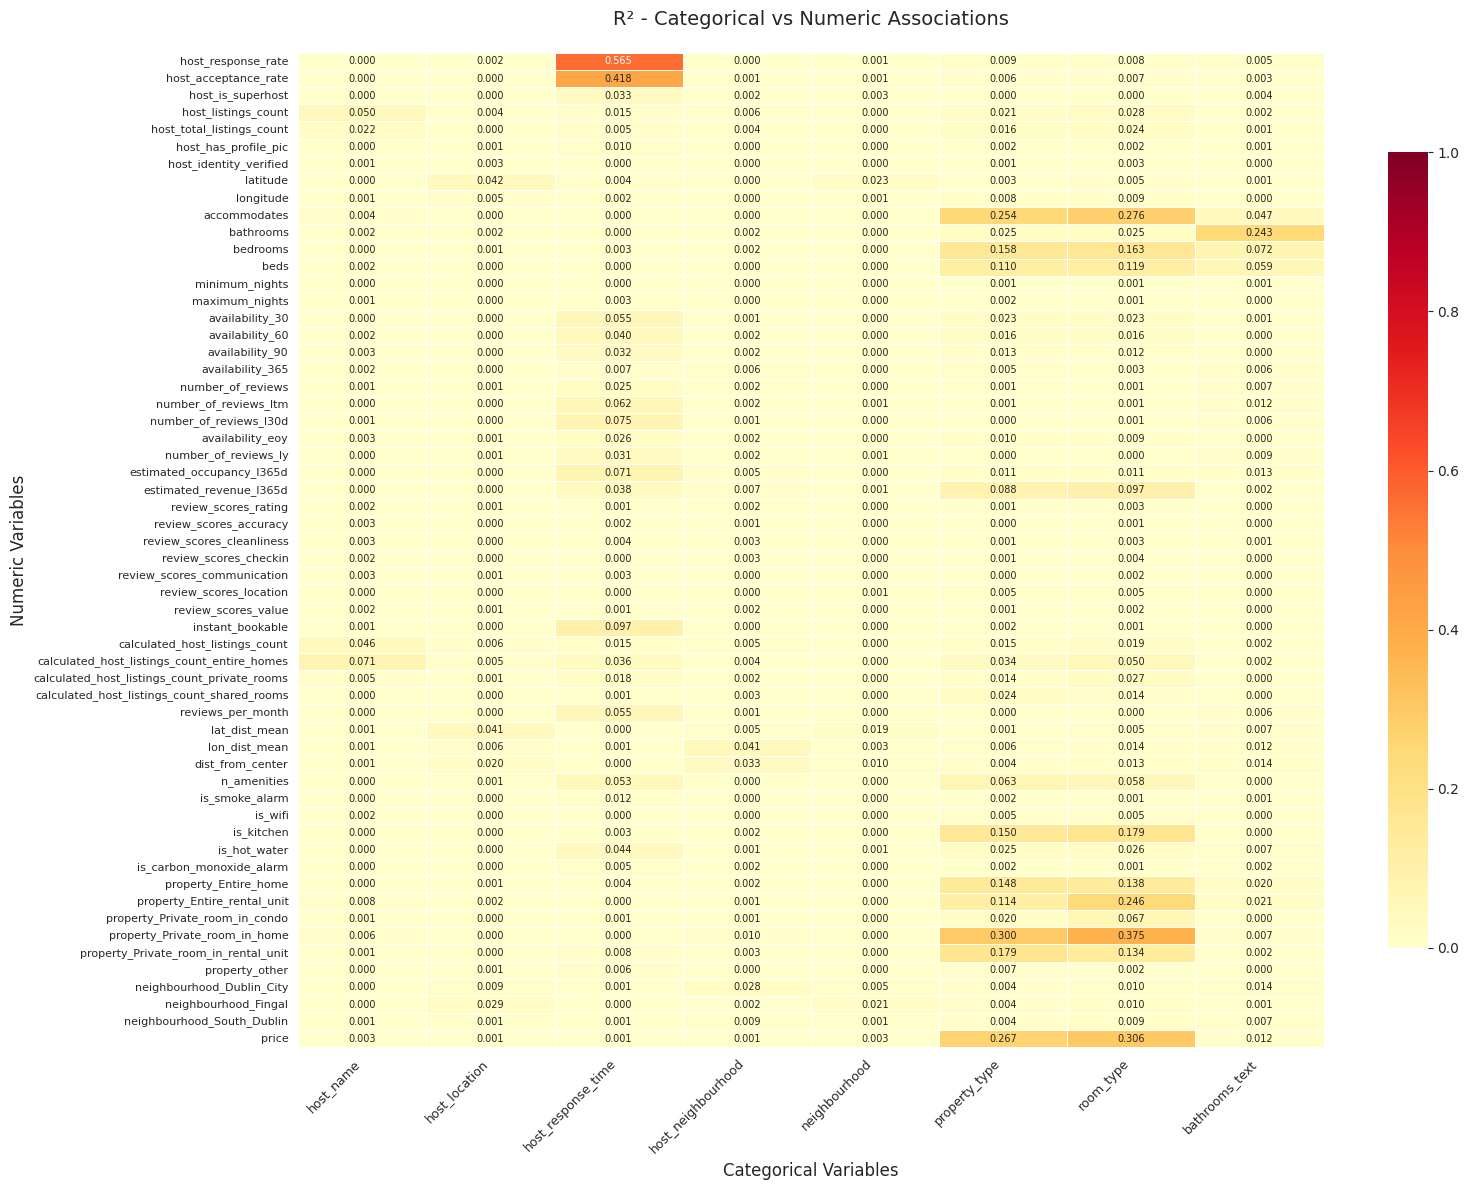

In [87]:
# Transpozycja: wiersze = numeryczne, kolumny = kategoryczne
r2_matrix_transposed = r2_matrix.T

# Przenieś 'price' na koniec (jeśli istnieje)
if 'price' in r2_matrix_transposed.index:
    rows_without_price = [row for row in r2_matrix_transposed.index if row != 'price']
    rows_reordered = rows_without_price + ['price']
    r2_matrix_transposed = r2_matrix_transposed.loc[rows_reordered]

print("\n" + "="*80)
print("HEATMAP: R² - All Associations")
print("="*80)
print(f"Ostatni wiersz: {r2_matrix_transposed.index[-1]}")  # Sprawdź ostatni wiersz

# Heatmapa R² - wszystkie korelacje
plt.figure(figsize=(16, 12))  # Zwiększona wysokość
sns.heatmap(r2_matrix_transposed.astype(float),
            annot=True,
            fmt='.3f',
            cmap='YlOrRd',
            vmin=0,
            vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 7})

plt.title("R² - Categorical vs Numeric Associations", fontsize=14, pad=20)
plt.xlabel("Categorical Variables", fontsize=12)
plt.ylabel("Numeric Variables", fontsize=12)
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=8, rotation=0)  # Dodano rotation=0 dla czytelności
plt.tight_layout()
plt.savefig('r2_heatmap_all.png', dpi=150, bbox_inches='tight')
plt.show()


TOP 5 CATEGORICAL VARIABLES CORRELATED WITH 'PRICE'
room_type        0.31
property_type    0.27
bathrooms_text   0.01
host_name        0.00
neighbourhood    0.00
Name: price, dtype: float64


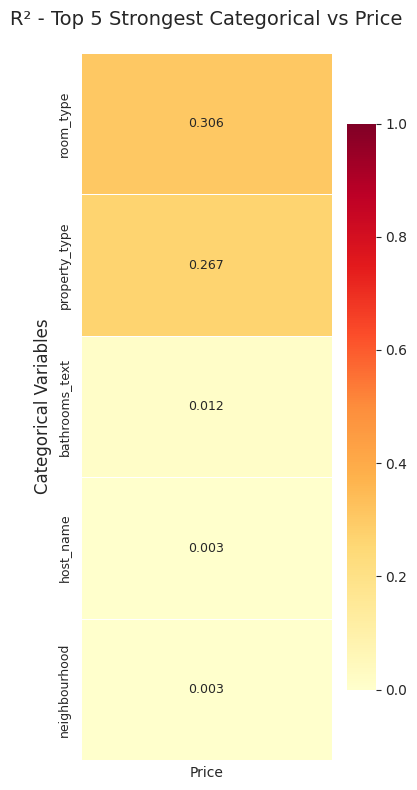

In [75]:
# Pobierz R² dla price
price_r2 = r2_matrix['price'].sort_values(ascending=False)
top_r2_price = price_r2.head(5)

print("\n" + "="*80)
print(f"TOP {len(top_r2_price)} CATEGORICAL VARIABLES CORRELATED WITH 'PRICE'")
print("="*80)
print(top_r2_price)

# Heatmapa R² - tylko top 10
plt.figure(figsize=(4, 8))  # Szerokość zmniejszona 4-krotnie (12/4=3)

# Przekształć Series w DataFrame dla heatmapy
top_r2_df = top_r2_price.to_frame()

sns.heatmap(top_r2_df,
            annot=True,
            fmt='.3f',
            cmap='YlOrRd',
            vmin=0,
            vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 9})

plt.title(f"R² - Top {len(top_r2_price)} Strongest Categorical vs Price", fontsize=14, pad=20)
plt.xlabel("Price")  # Usunięty podpis kolumny
plt.ylabel("Categorical Variables", fontsize=12)
plt.xticks([])  # Usunięte etykiety osi X
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('r2_heatmap_top10.png', dpi=150, bbox_inches='tight')
plt.show()